# **Problem Statement**

## Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).

## Objective

“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description

The data provided is a transformed version of the original data which was collected using sensors.

- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.

Both the datasets consist of 40 predictor variables and 1 target variable.

# **Installing and Importing the necessary libraries**

In [120]:
# Installing the libraries with the specified version
!pip install --no-deps tensorflow scikit-learn matplotlib seaborn numpy pandas -q --user --no-warn-script-location

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

#### Importing Python Libraries for the Project

In [121]:
# Library for data manipulation, analysis and computation.
import pandas as pd
import numpy as np

#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split

#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer

#Imports the Matplotlib library for creating visualizations.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns

# Time related functions to measure model training time.
import time

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
#Imports metrics from
from sklearn import metrics

#Imports the tensorflow, keras and layers.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# **Loading the Data**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

# File path
train_file_path = './data/Train.csv'
test_file_path = './data/Test.csv'

# Load Train and Test data. Making copies
df_train = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)

data = df_train.copy()
data_test = df_test.copy()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Data Overview**

#### Let's check the shape of the data

In [123]:
print(f'Training data has {data.shape[0]} rows and {data.shape[1]} columns')
print(f'Testing data has {data_test.shape[0]} rows and {data_test.shape[1]} columns')

Training data has 20000 rows and 41 columns
Testing data has 5000 rows and 41 columns


#### View samples for Train and test data

In [124]:
# Training Sample
data.sample(6)

V1        V2        V3        V4        V5        V6        V7  \
14422  2.345874 -0.780159  2.762208 -1.226953 -1.915147 -0.901748 -0.473840   
8884  -0.702688 -0.658541  4.072342 -2.533959  0.865890 -3.031993 -3.663282   
6531  -1.505498 -0.927169  3.253656  5.597332 -2.500830 -2.699077 -2.857563   
8834   3.305611  3.232675  6.375132  2.646686 -2.929418 -0.971152 -0.418094   
7848  -2.825324 -1.858277  4.473403 -3.022760 -0.026890  1.291787 -1.751258   
15180 -0.030897  2.519627 -0.628288 -2.081242 -0.240956  0.660520  2.072394   

             V8        V9       V10  ...       V32       V33       V34  \
14422  0.625504 -0.966127  0.306199  ... -0.513980  0.671974 -0.399079   
8884   1.375410  2.634877 -3.858950  ...  1.290653 -1.594165 -6.032303   
6531  -1.731813  3.343289 -0.293370  ... -0.370549 -1.343780  2.669974   
8834  -5.748805  2.629831  0.820256  ... -6.107784 -0.878941  2.777518   
7848  -4.430959 -1.460192  3.605788  ... -2.761521  2.116555  1.478792   
15180  0.079112 -0.830513 -2.603724  ... -6.818104 -1.099954  1.048974   

            V35       V36       V37       V38       V39       V40  Target  
14422  4.989885  0.608471 -0.349863 -1.141539 -0.398354 -0.106991       0  
8884   1.778260  5.391220  2.990589 -9.107082  1.702261  1.398741       0  
6531   4.656245 -1.897085 -0.371993 -2.668998  0.651999 -6.202456       0  
8834   5.795204 -1.844047 -2.221783  4.296302  1.549593 -5.043223       0  
7848   1.497348  6.172616 -0.261053  3.427416  4.121375 -1.516017       0  
15180 -2.326456 -1.223247  2.331523  3.711123  0.809110  2.889937       0  

[6 rows x 41 columns]

In [125]:
# Testing Sample
data_test.sample(6)

V1        V2        V3        V4        V5        V6        V7  \
783  -2.111747 -6.083330  4.231628 -3.892333 -1.434736 -1.538357 -2.611329   
2291  2.370855 -1.949305  8.130551 -5.375034 -2.171022 -0.840381 -0.474310   
511   1.100714  0.517395  1.490702  6.153105 -1.865088 -3.242881 -2.116867   
4017  3.738017  4.421031  6.089815  2.744663 -0.954435 -0.595127 -0.762879   
2187  1.845773  1.461789  1.164203  1.762124 -1.413947 -1.569924  1.268048   
4051       NaN  3.983783  0.524783 -4.776552  2.590121  1.040410  3.097642   

            V8        V9       V10  ...       V32       V33       V34  \
783   2.011057 -2.111907  3.199700  ...  2.699937  1.776579  0.006476   
2291 -1.958374 -1.584143  3.721258  ... -5.005467 -0.485497  1.392308   
511   0.678974  3.483969 -1.909456  ...  3.523299 -1.072425 -0.212929   
4017 -4.797127  3.460075 -0.927095  ... -4.122046  0.063299 -0.792344   
2187  1.593280 -1.225038  0.356615  ...  1.598333  0.478686  1.580617   
4051 -1.744755 -0.269377  0.410768  ... -4.134022 -5.444258 -1.925177   

           V35       V36       V37       V38       V39       V40  Target  
783   3.760635  7.976214  0.167882 -6.983997  2.499813 -1.413536       0  
2291  3.808799  8.284459 -1.014462 -1.333772  3.829827 -0.721910       0  
511   5.425893 -4.475417 -0.972408 -4.572919 -2.007939 -4.737241       0  
4017  3.948645 -2.060231 -2.308384  1.822577  0.148800 -2.114423       0  
2187  4.066193 -2.489088 -1.583831  0.723596 -1.220343 -2.013894       1  
4051 -5.736453  4.155637  0.047600  3.864513  1.224684  4.916014       0  

[6 rows x 41 columns]

#### Checking datatypes of the training set

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [127]:
# Converting Target to float
data['Target'] = data['Target'].astype(float)

#### Checking datatypes of the testing set

In [128]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

In [129]:
# Converting Target to float
data_test['Target'] = data_test['Target'].astype(float)

In [130]:
def check_missing_values(df):
  print('-'*30)
  dups = df.duplicated().sum()
  print(f'Number of Duplicates in dataset: {dups} ')

  # Missing values on Training dataset
  missing_values = df.isnull().sum()
  # Loop to get index and values greater than 0
  for index, value in missing_values.items():
    print(f'Missing {index} count {value}')
  print('\n')

In [131]:
# Duplicate and missing value check on Train and Test dataset
print('Train Dataset')
check_missing_values(data)
print('Test Dataset')
check_missing_values(data_test)

Train Dataset
------------------------------
Number of Duplicates in dataset: 0 
Missing V1 count 18
Missing V2 count 18
Missing V3 count 0
Missing V4 count 0
Missing V5 count 0
Missing V6 count 0
Missing V7 count 0
Missing V8 count 0
Missing V9 count 0
Missing V10 count 0
Missing V11 count 0
Missing V12 count 0
Missing V13 count 0
Missing V14 count 0
Missing V15 count 0
Missing V16 count 0
Missing V17 count 0
Missing V18 count 0
Missing V19 count 0
Missing V20 count 0
Missing V21 count 0
Missing V22 count 0
Missing V23 count 0
Missing V24 count 0
Missing V25 count 0
Missing V26 count 0
Missing V27 count 0
Missing V28 count 0
Missing V29 count 0
Missing V30 count 0
Missing V31 count 0
Missing V32 count 0
Missing V33 count 0
Missing V34 count 0
Missing V35 count 0
Missing V36 count 0
Missing V37 count 0
Missing V38 count 0
Missing V39 count 0
Missing V40 count 0
Missing Target count 0


Test Dataset
------------------------------
Number of Duplicates in dataset: 0 
Missing V1 count 5
Mi

#### Checking Summary of Train data

In [132]:
data.describe()

V1            V2            V3            V4            V5  \
count  19982.000000  19982.000000  20000.000000  20000.000000  20000.000000   
mean      -0.271996      0.440430      2.484699     -0.083152     -0.053752   
std        3.441625      3.150784      3.388963      3.431595      2.104801   
min      -11.876451    -12.319951    -10.708139    -15.082052     -8.603361   
25%       -2.737146     -1.640674      0.206860     -2.347660     -1.535607   
50%       -0.747917      0.471536      2.255786     -0.135241     -0.101952   
75%        1.840112      2.543967      4.566165      2.130615      1.340480   
max       15.493002     13.089269     17.090919     13.236381      8.133797   

                 V6            V7            V8            V9           V10  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean      -0.995443     -0.879325     -0.548195     -0.016808     -0.012998   
std        2.040970      1.761626      3.295756      2.160568      2.193201   
min      -10.227147     -7.949681    -15.657561     -8.596313     -9.853957   
25%       -2.347238     -2.030926     -2.642665     -1.494973     -1.411212   
50%       -1.000515     -0.917179     -0.389085     -0.067597      0.100973   
75%        0.380330      0.223695      1.722965      1.409203      1.477045   
max        6.975847      8.006091     11.679495      8.137580      8.108472   

       ...           V32           V33           V34           V35  \
count  ...  20000.000000  20000.000000  20000.000000  20000.000000   
mean   ...      0.303799      0.049825     -0.462702      2.229620   
std    ...      5.500400      3.575285      3.183841      2.937102   
min    ...    -19.876502    -16.898353    -17.985094    -15.349803   
25%    ...     -3.420469     -2.242857     -2.136984      0.336191   
50%    ...      0.052073     -0.066249     -0.255008      2.098633   
75%    ...      3.761722      2.255134      1.436935      4.064358   
max    ...     23.633187     16.692486     14.358213     15.291065   

                V36           V37           V38           V39           V40  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       1.514809      0.011316     -0.344025      0.890653     -0.875630   
std        3.800860      1.788165      3.948147      1.753054      3.012155   
min      -14.833178     -5.478350    -17.375002     -6.438880    -11.023935   
25%       -0.943809     -1.255819     -2.987638     -0.272250     -2.940193   
50%        1.566526     -0.128435     -0.316849      0.919261     -0.920806   
75%        3.983939      1.175533      2.279399      2.057540      1.119897   
max       19.329576      7.467006     15.289923      7.759877     10.654265   

             Target  
count  20000.000000  
mean       0.055500  
std        0.228959  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 41 columns]

# **Exploratory Data Analysis**

## Univariate analysis

In [133]:
# Creating function to plot a boxplot and a histogram along the same scale
def histogram_boxplot(data, feature, figsize=(10, 6), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10,6))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


Feature: V1


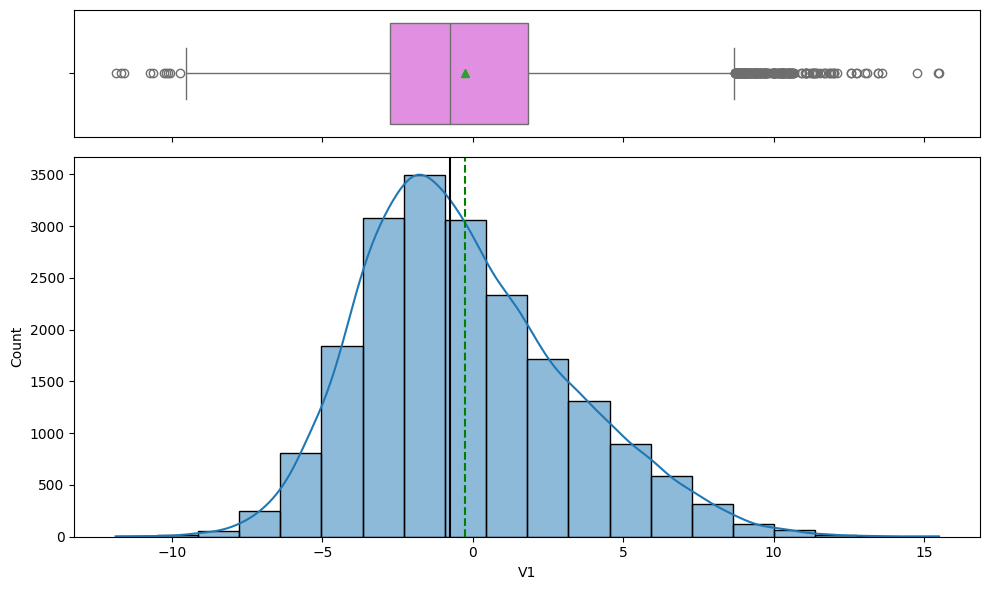


Feature: V2


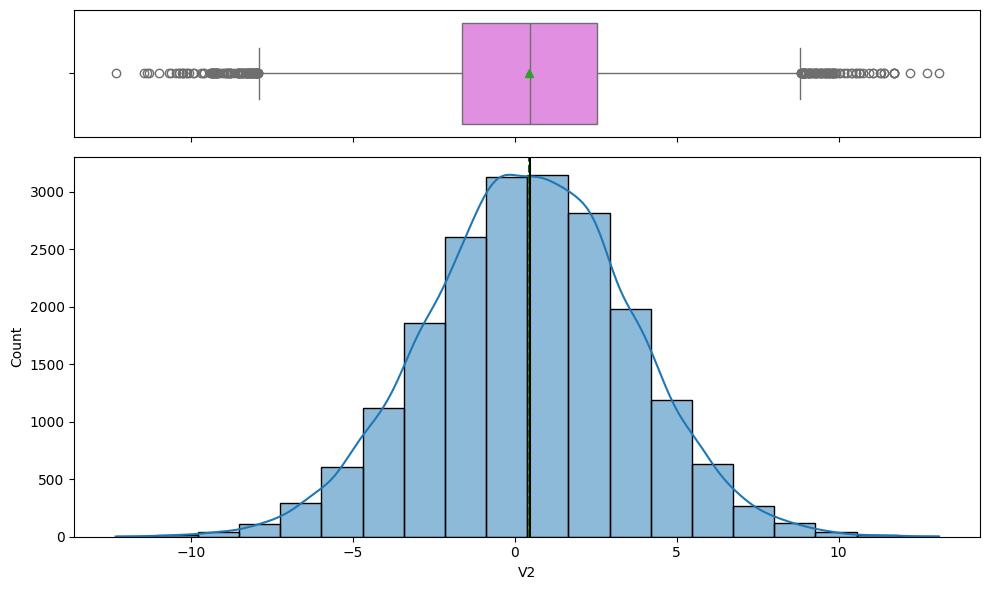


Feature: V3


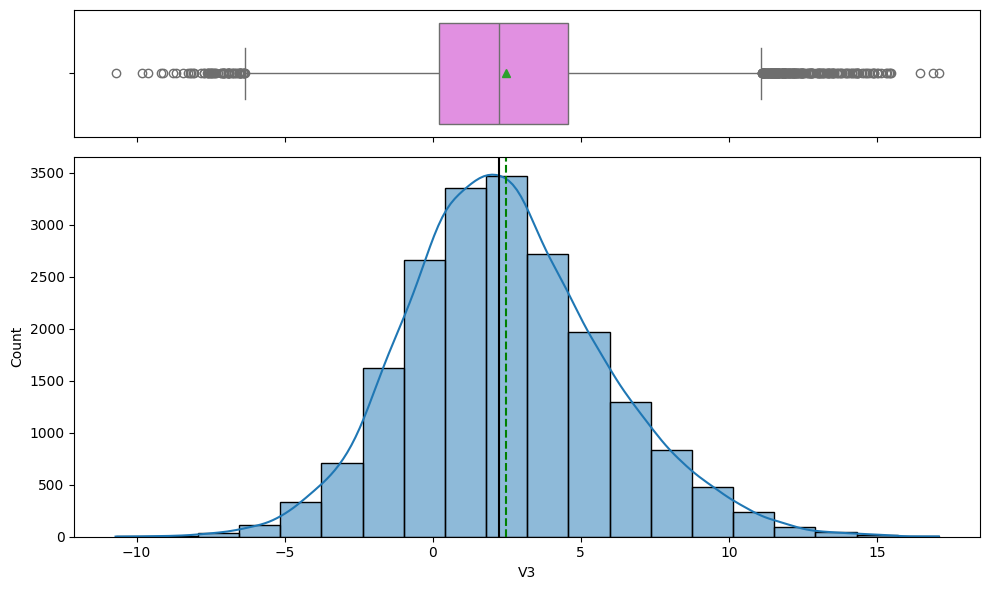


Feature: V4


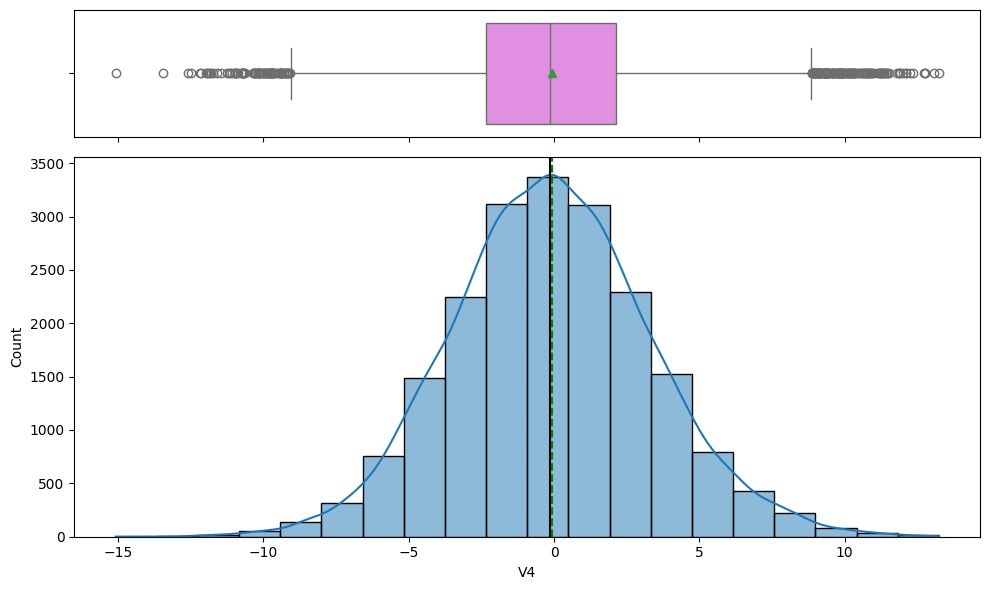


Feature: V5


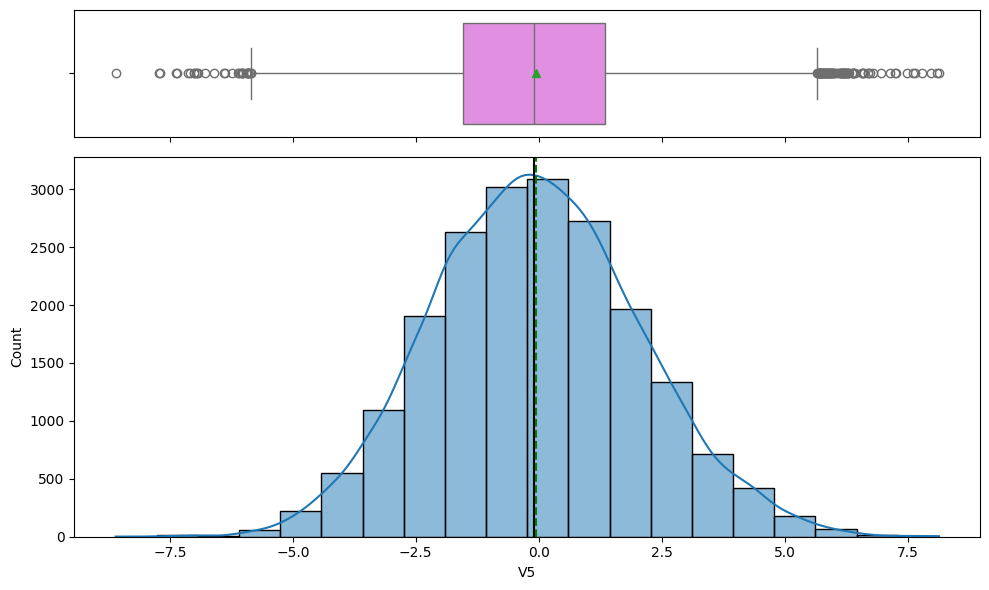


Feature: V6


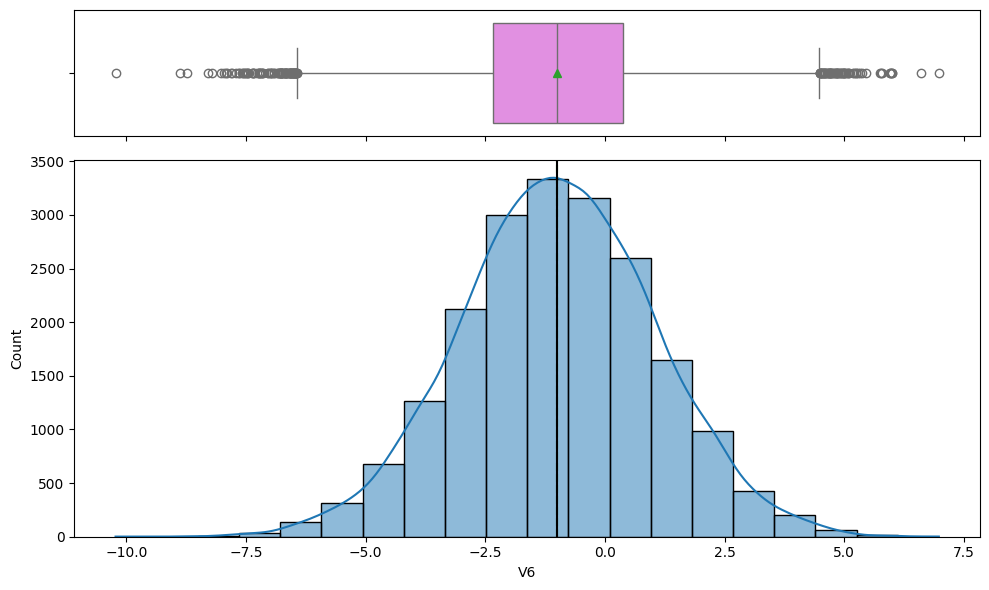


Feature: V7


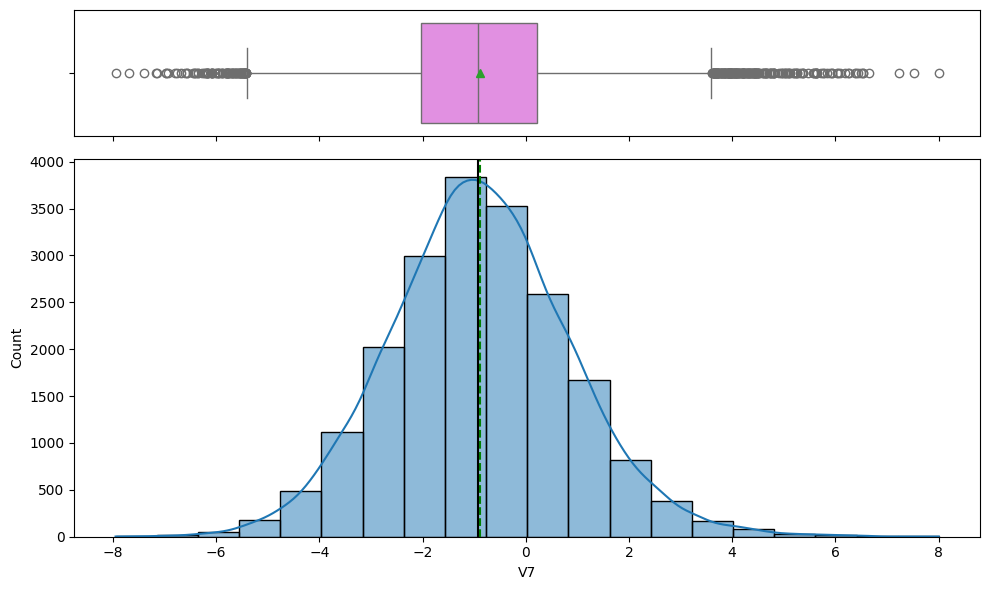


Feature: V8


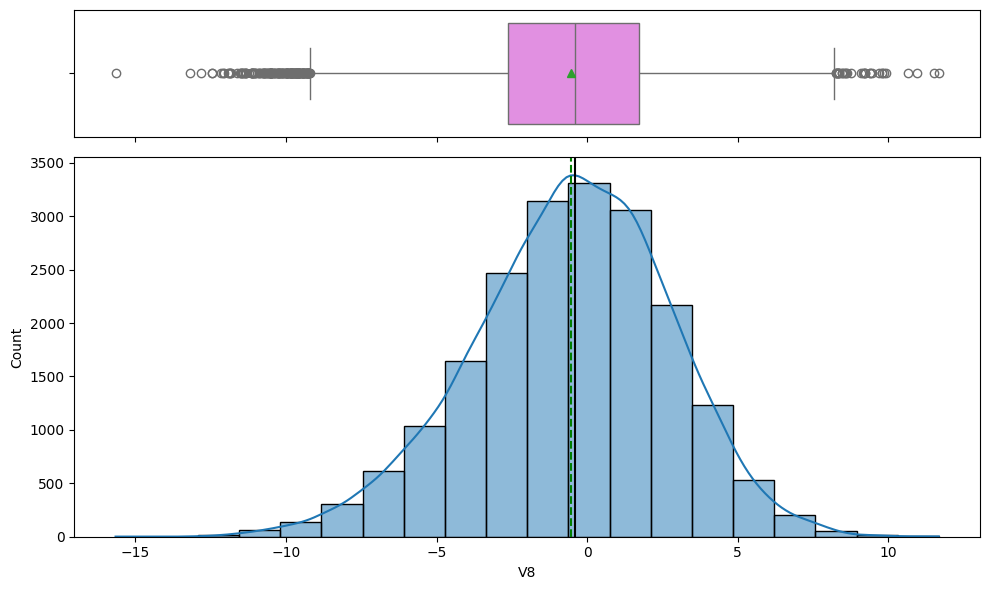


Feature: V9


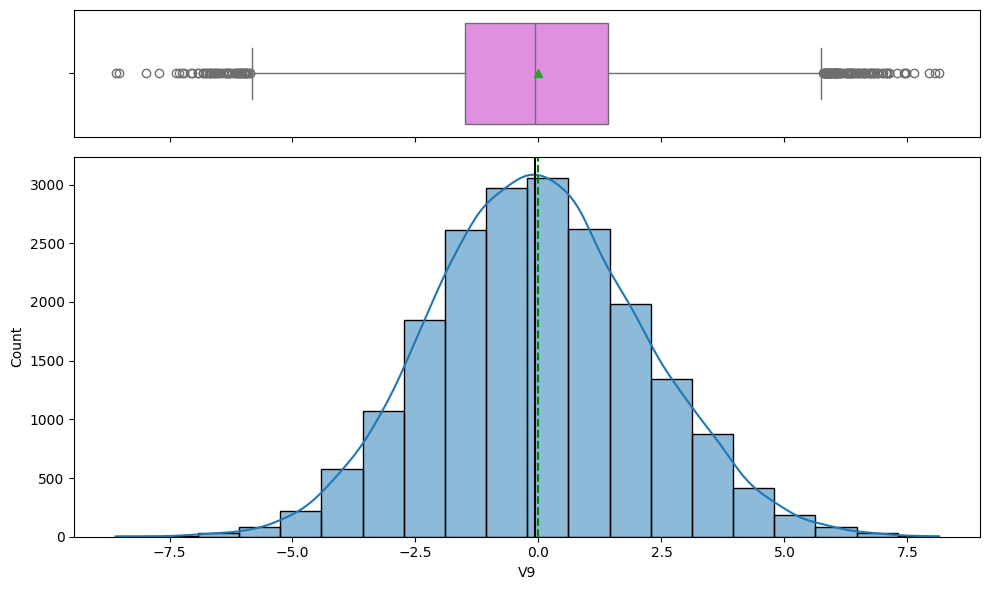


Feature: V10


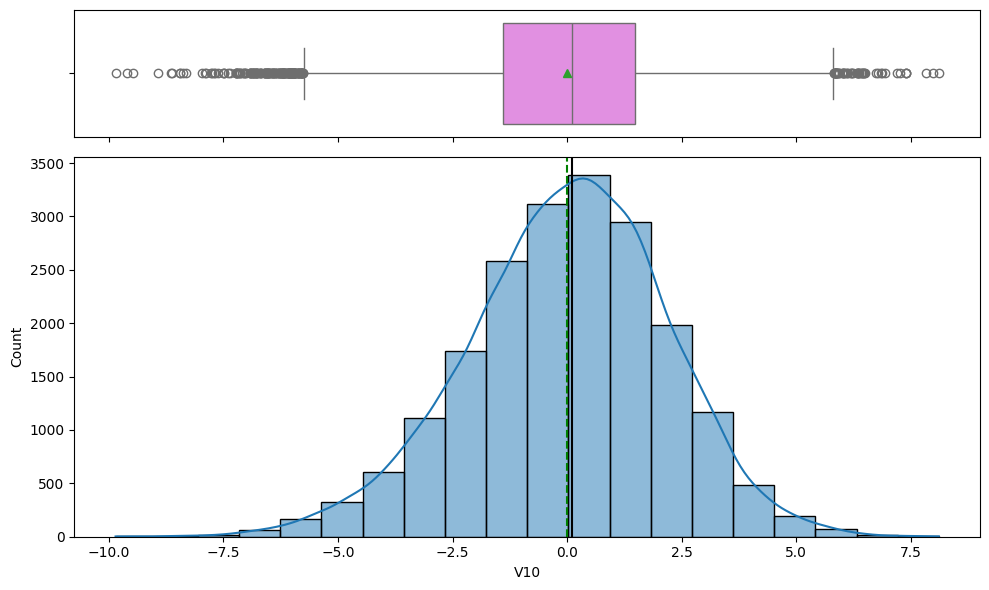


Feature: V11


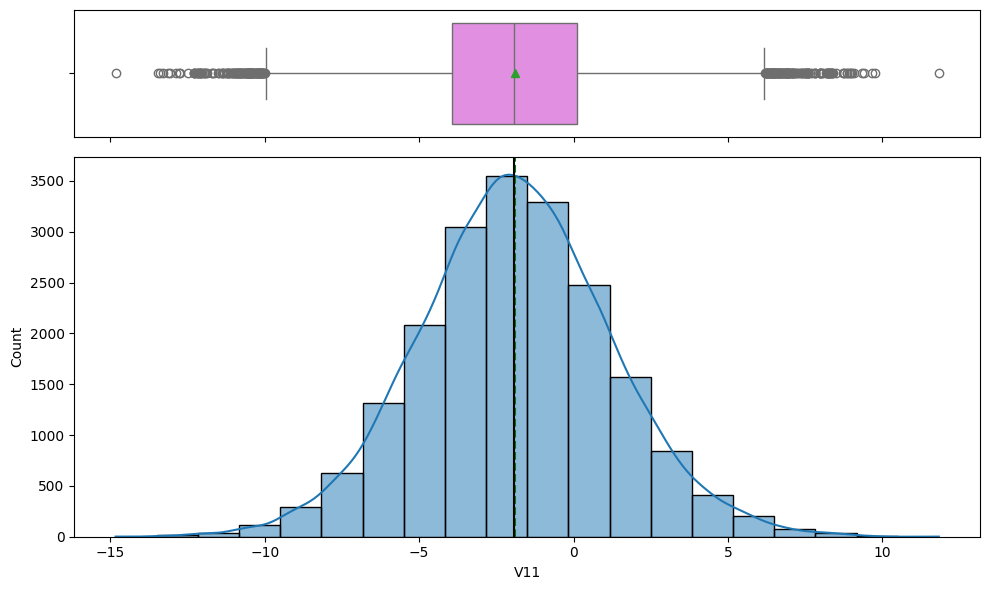


Feature: V12


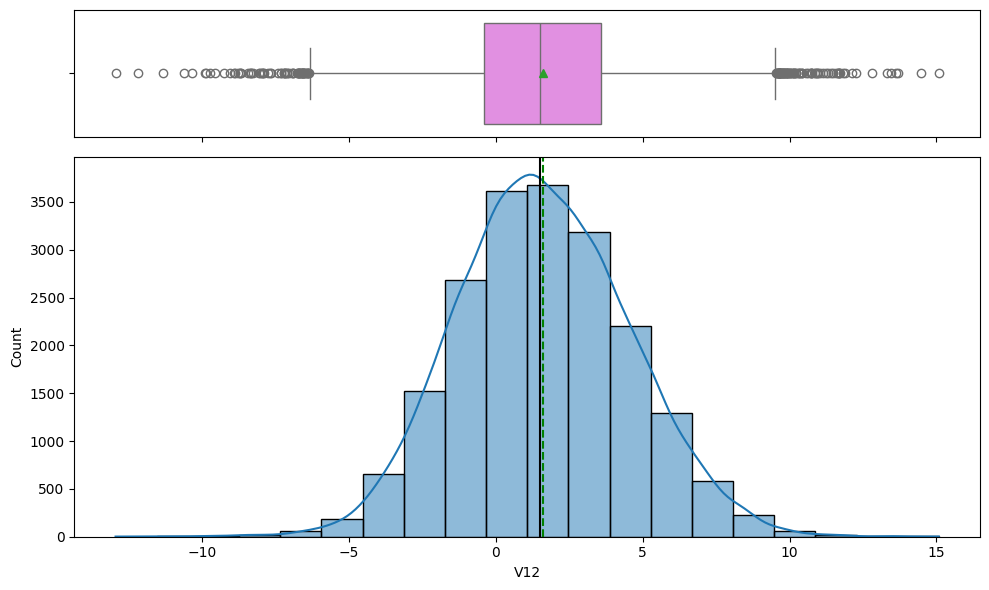


Feature: V13


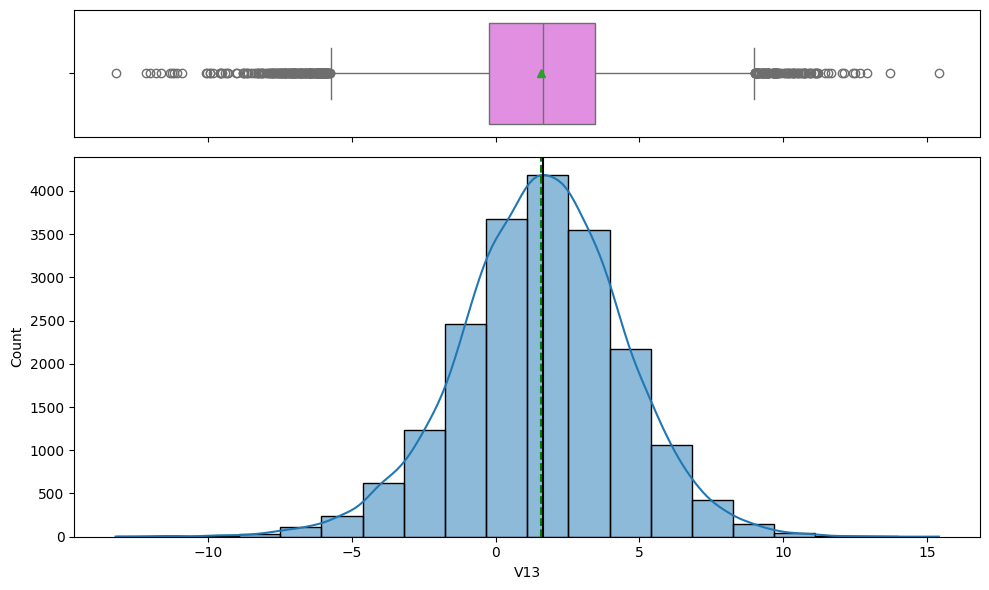


Feature: V14


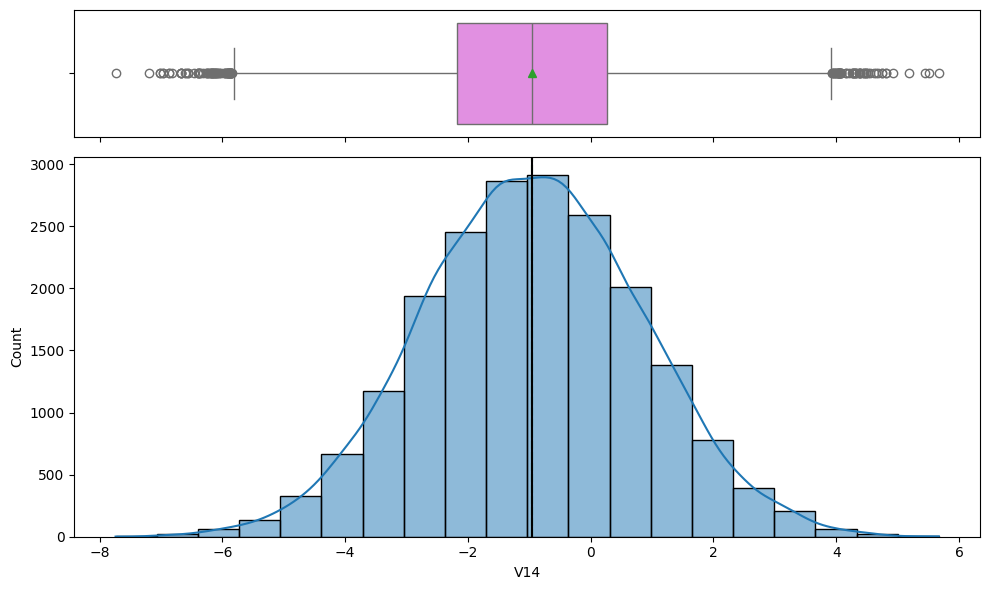


Feature: V15


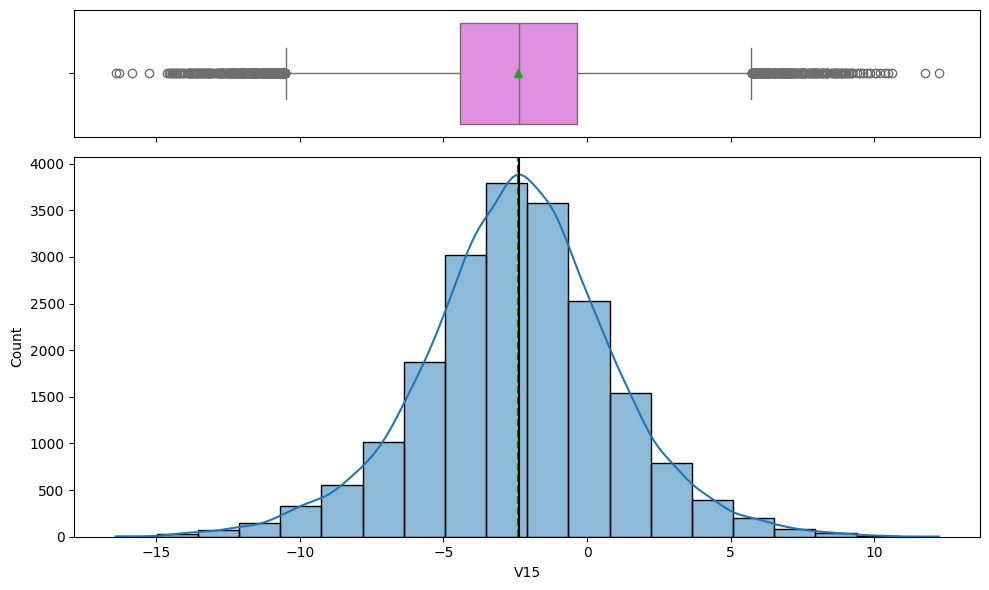


Feature: V16


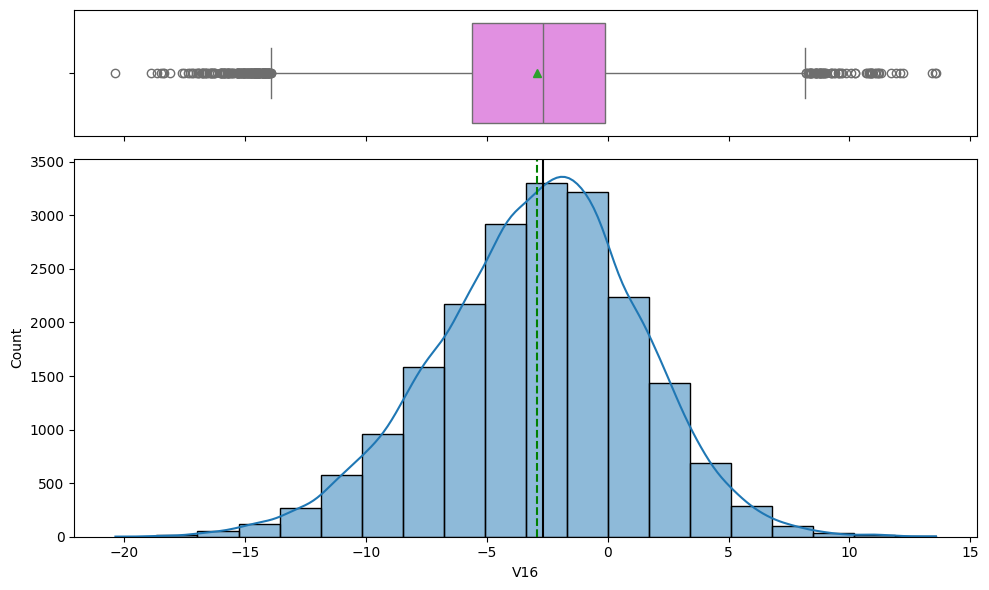


Feature: V17


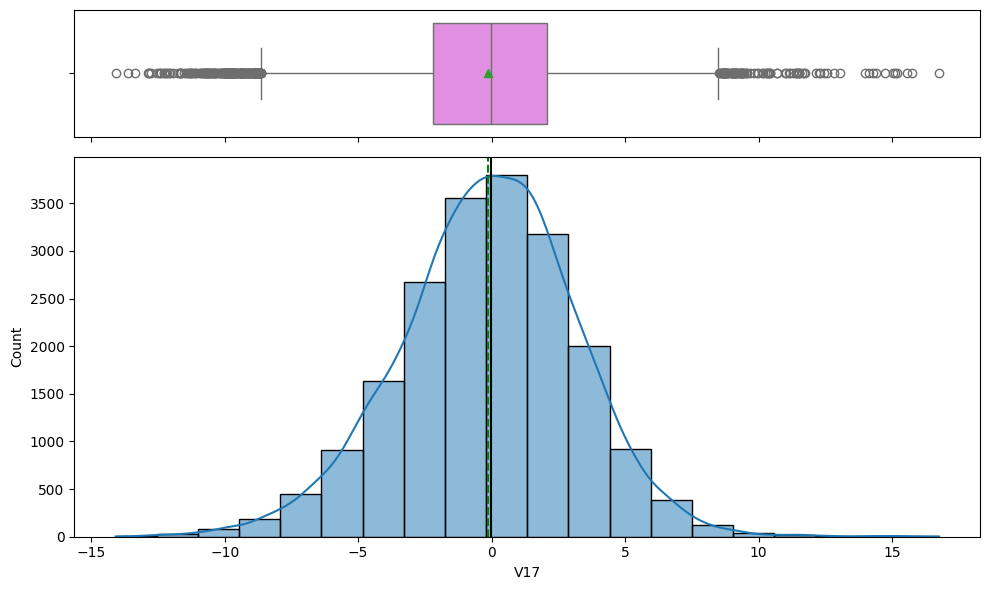


Feature: V18


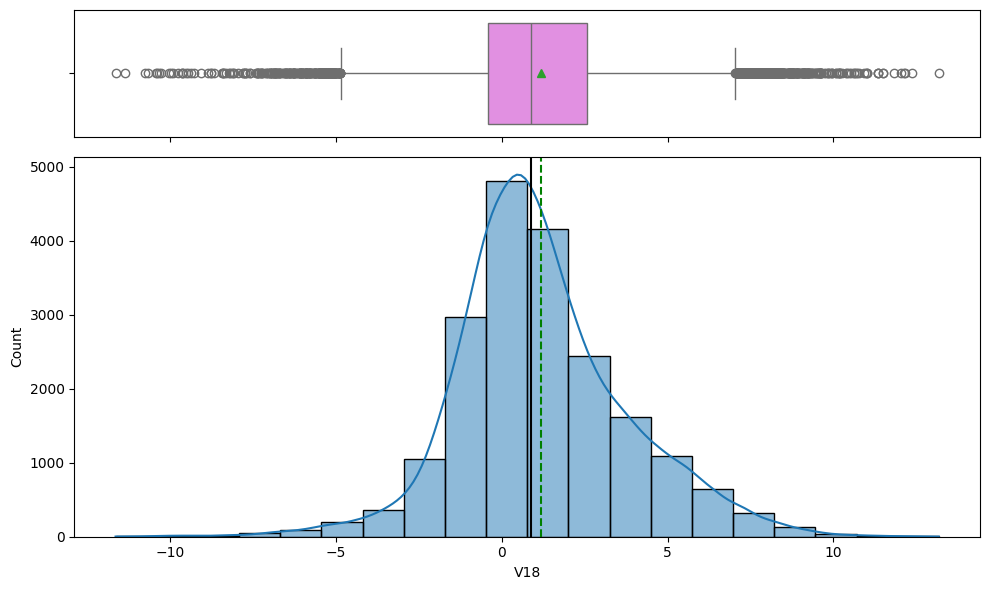


Feature: V19


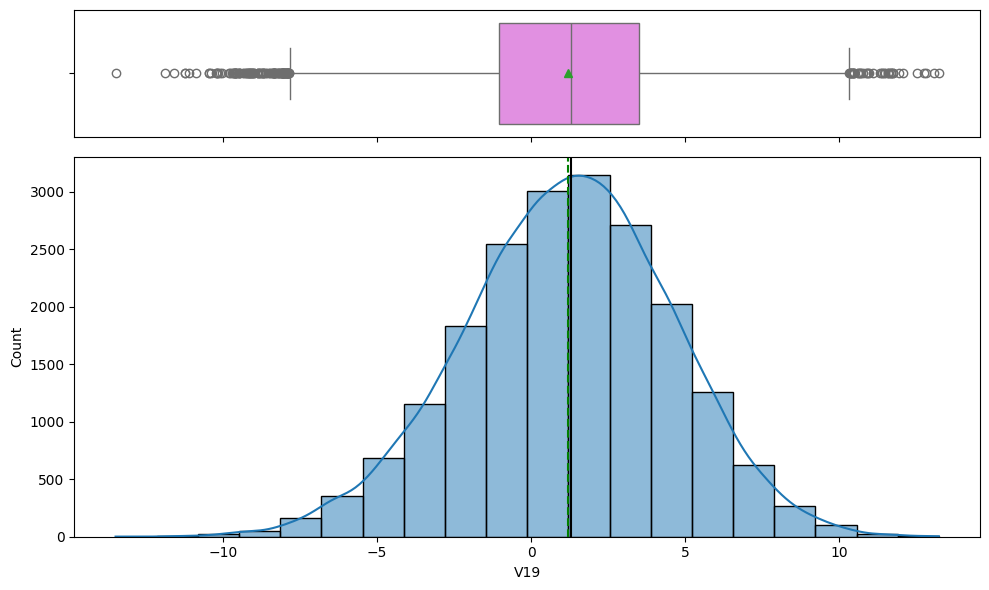


Feature: V20


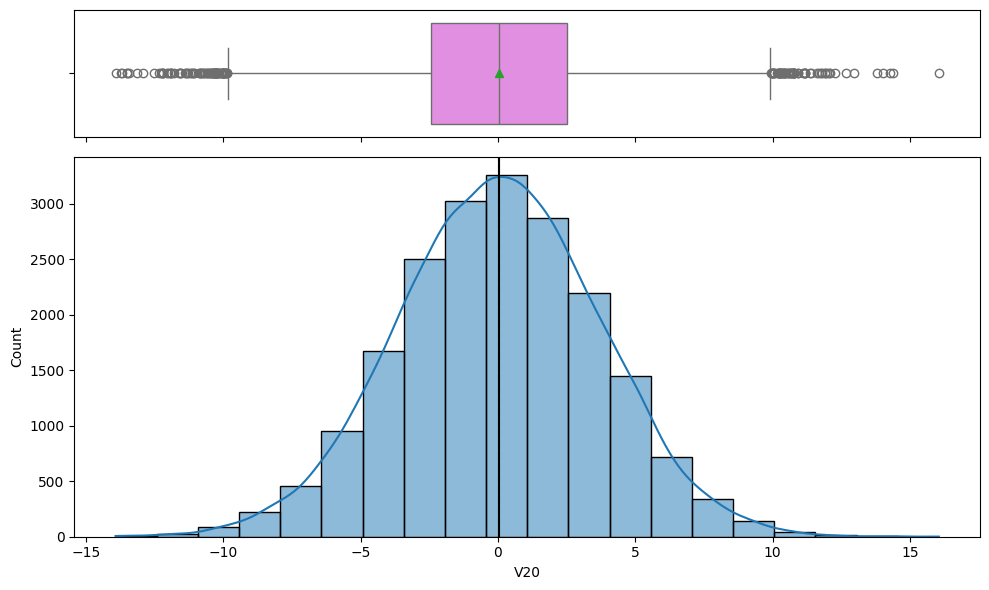


Feature: V21


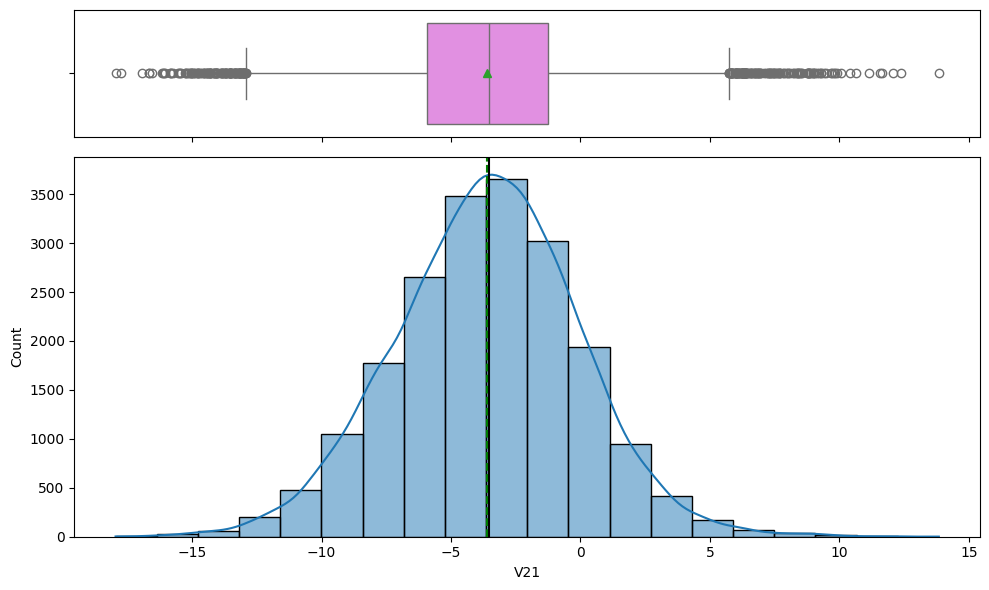


Feature: V22


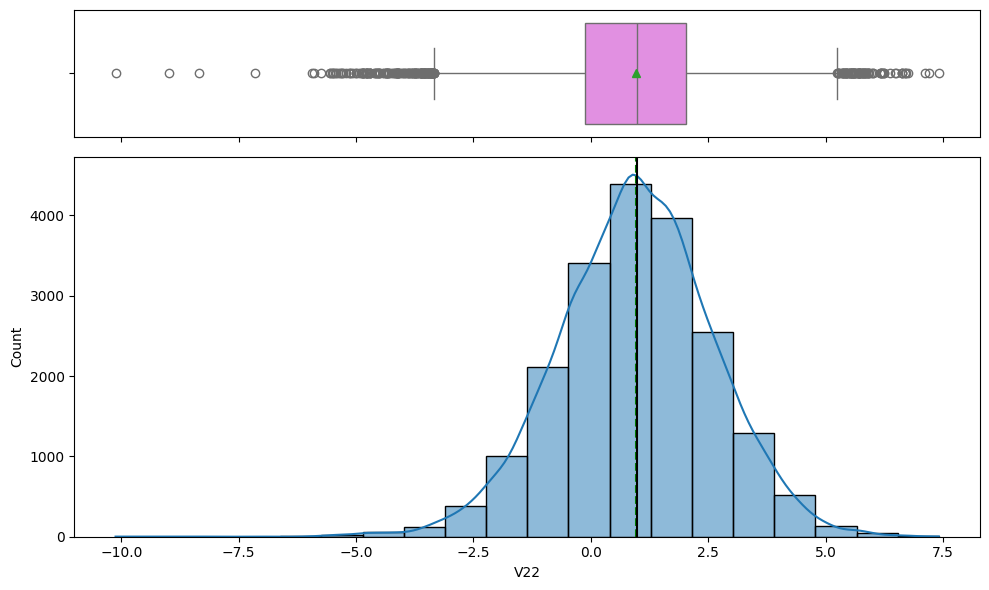


Feature: V23


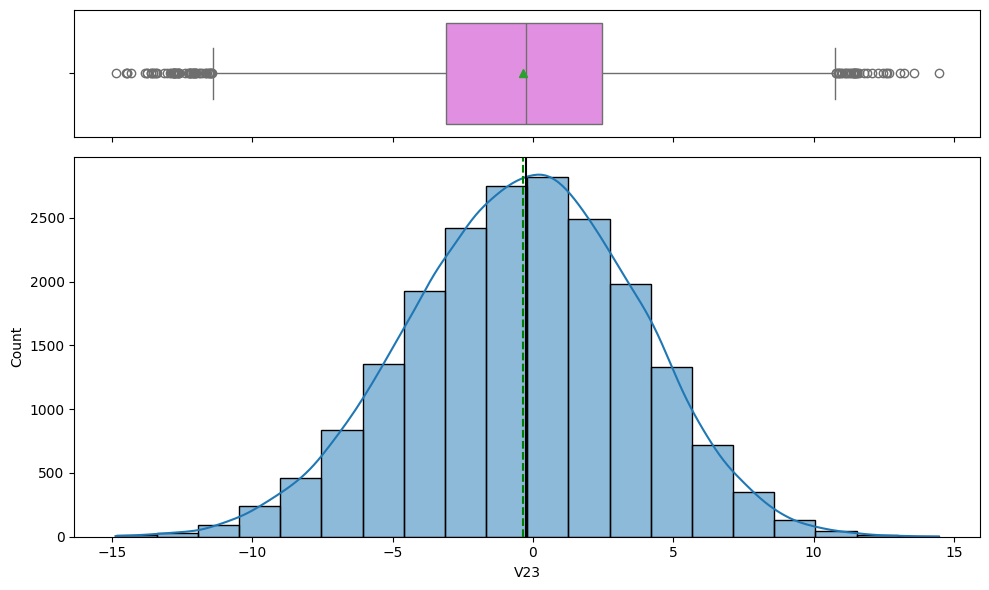


Feature: V24


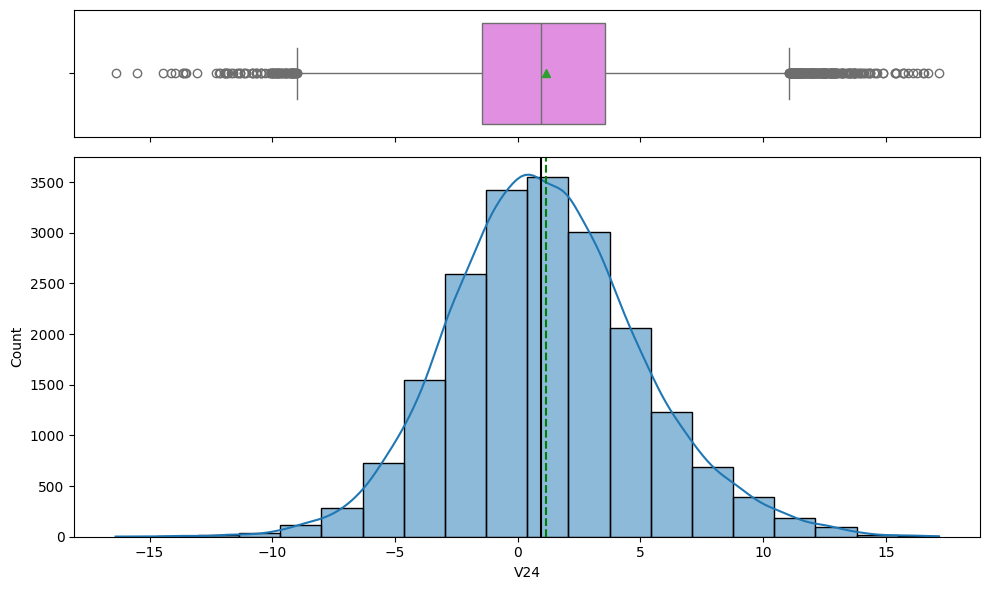


Feature: V25


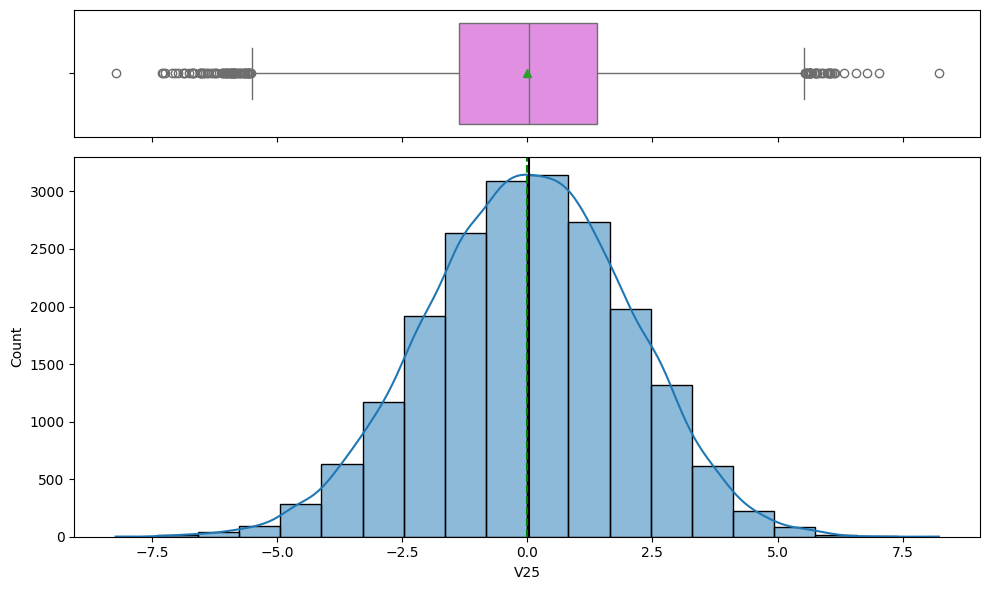


Feature: V26


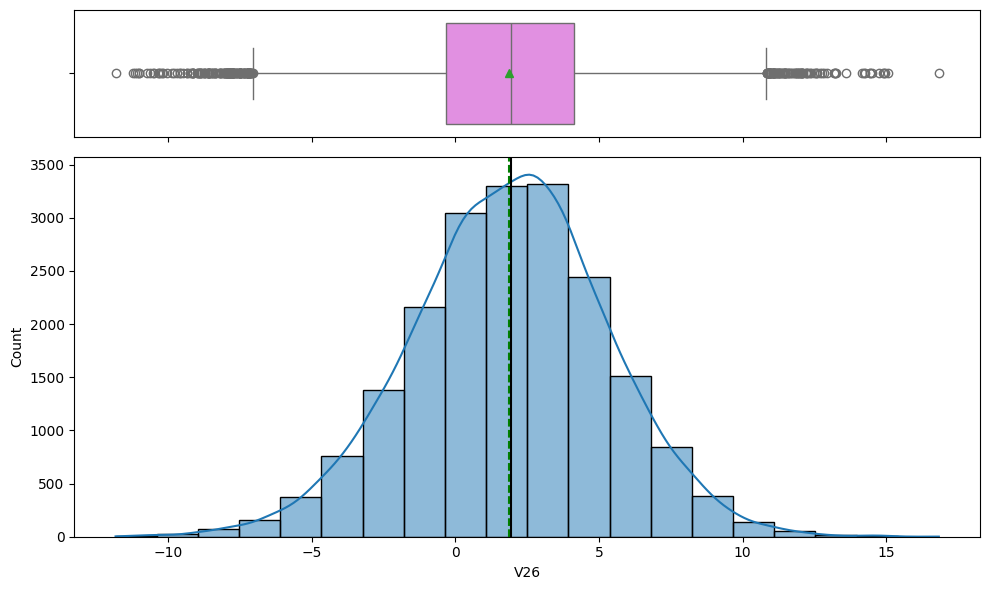


Feature: V27


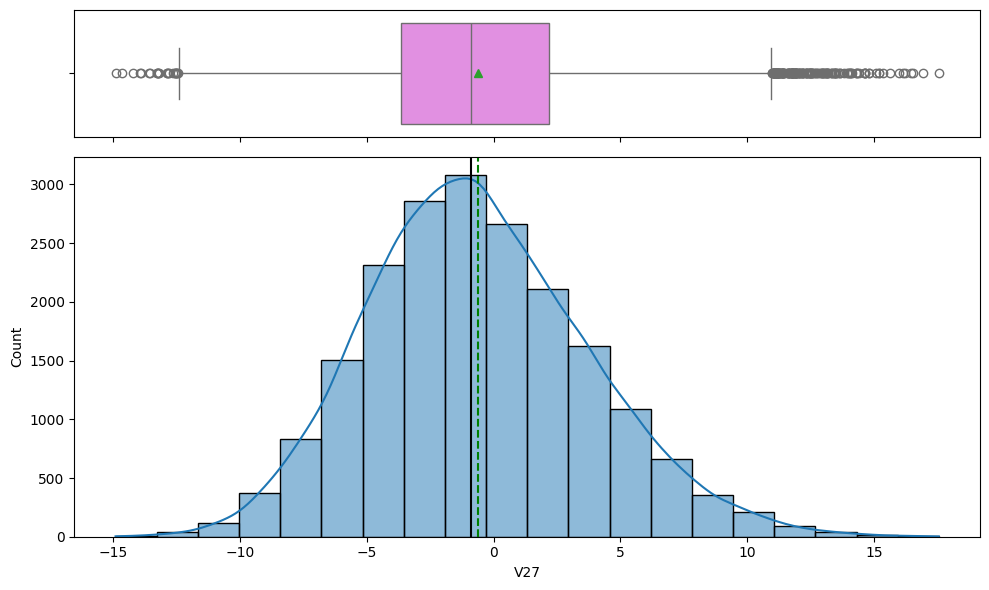


Feature: V28


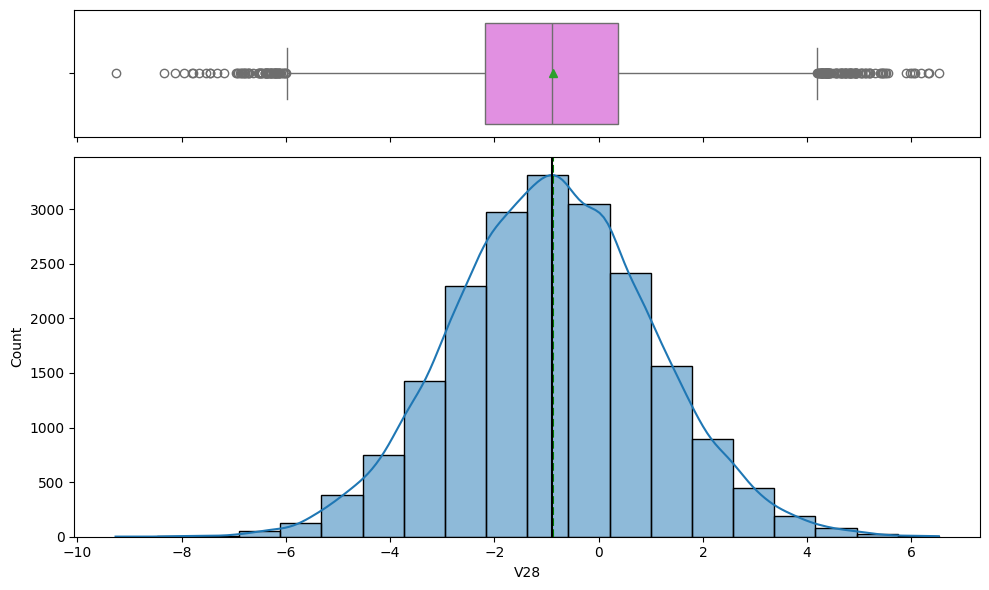


Feature: V29


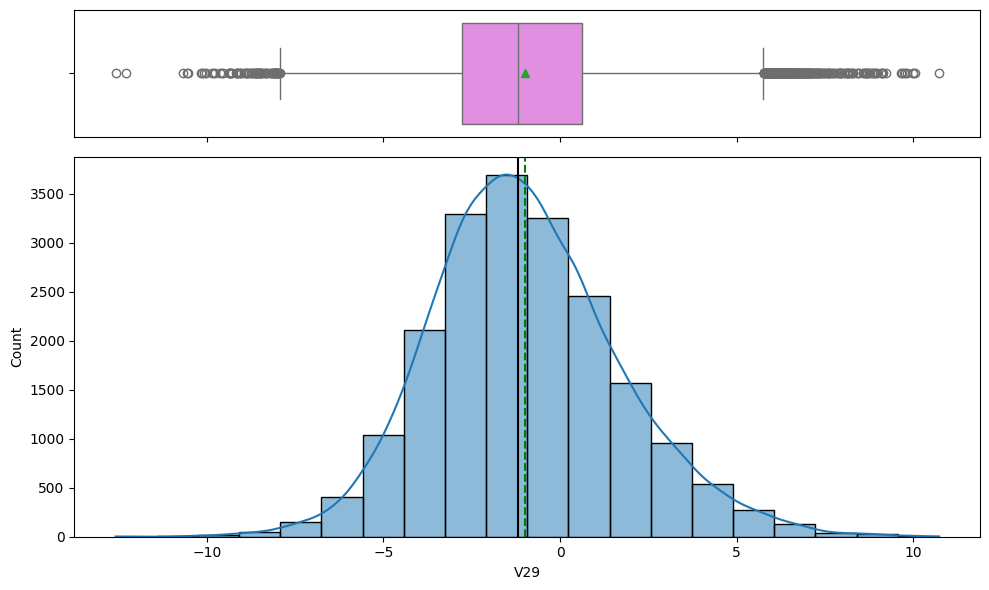


Feature: V30


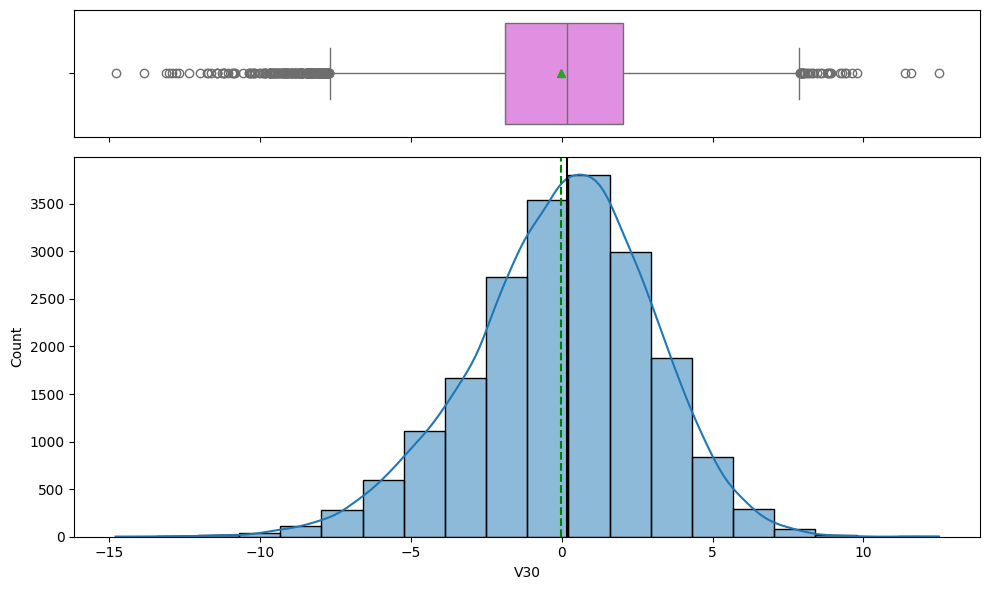


Feature: V31


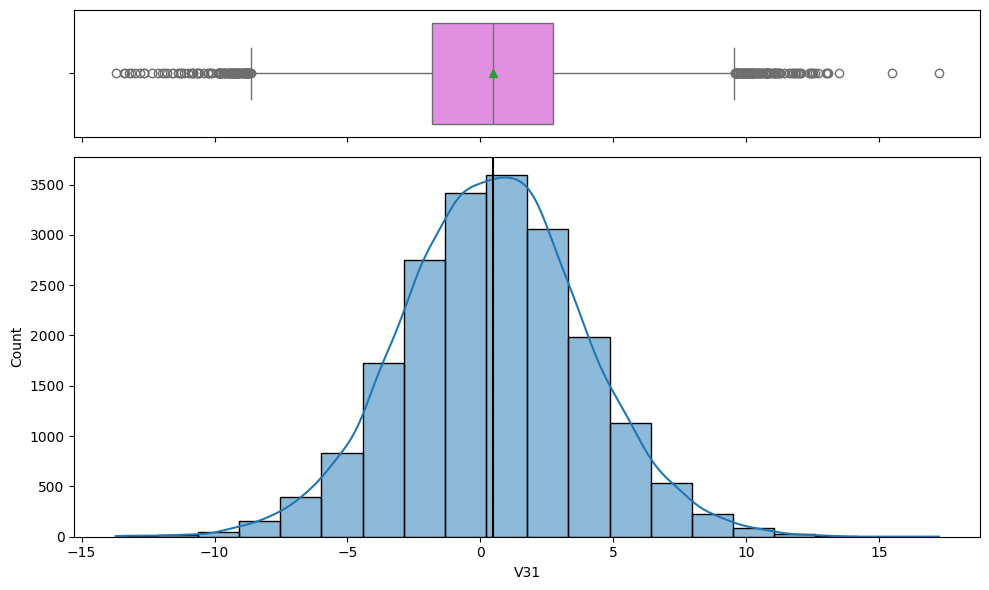


Feature: V32


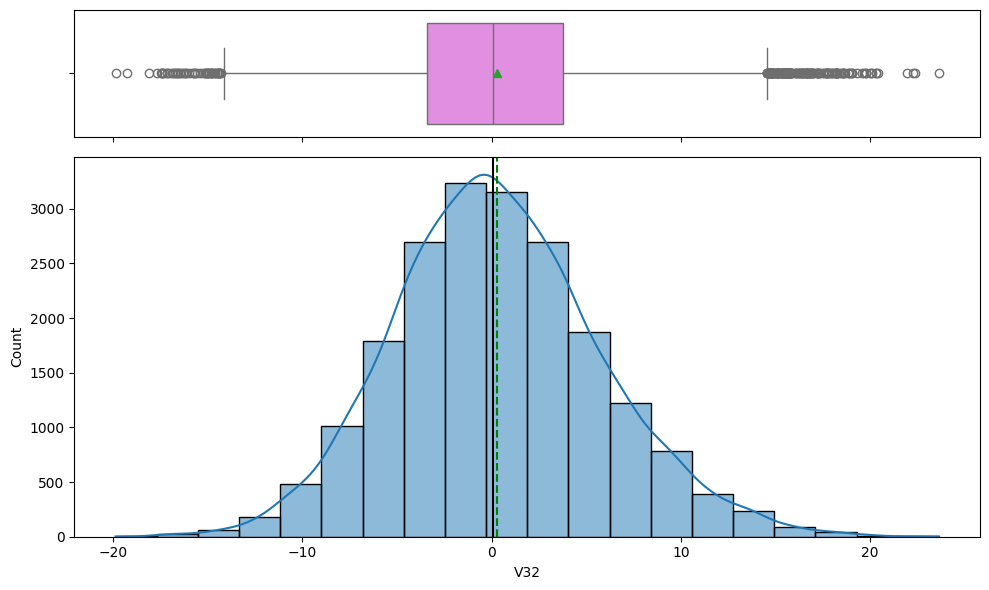


Feature: V33


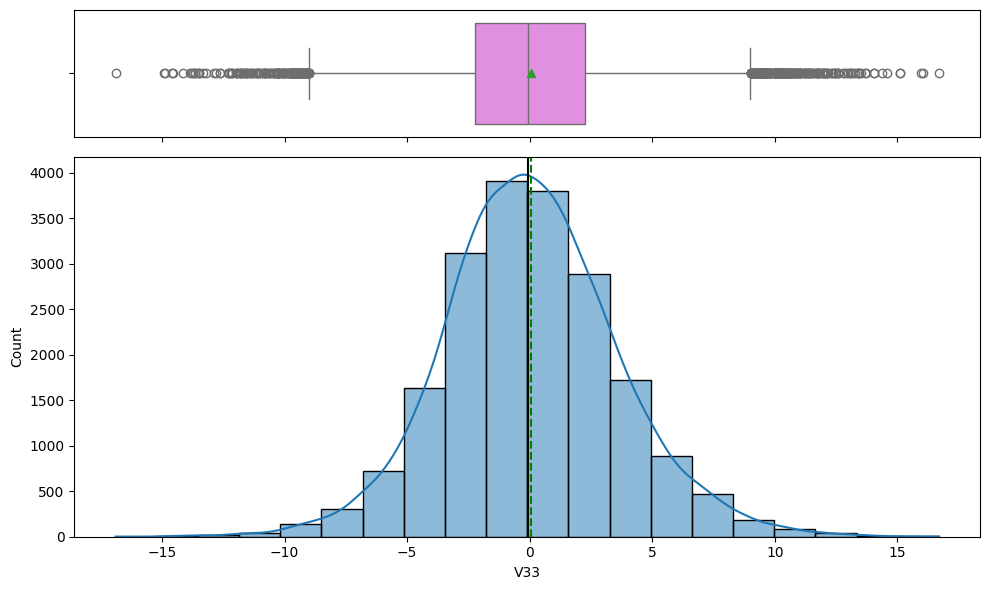


Feature: V34


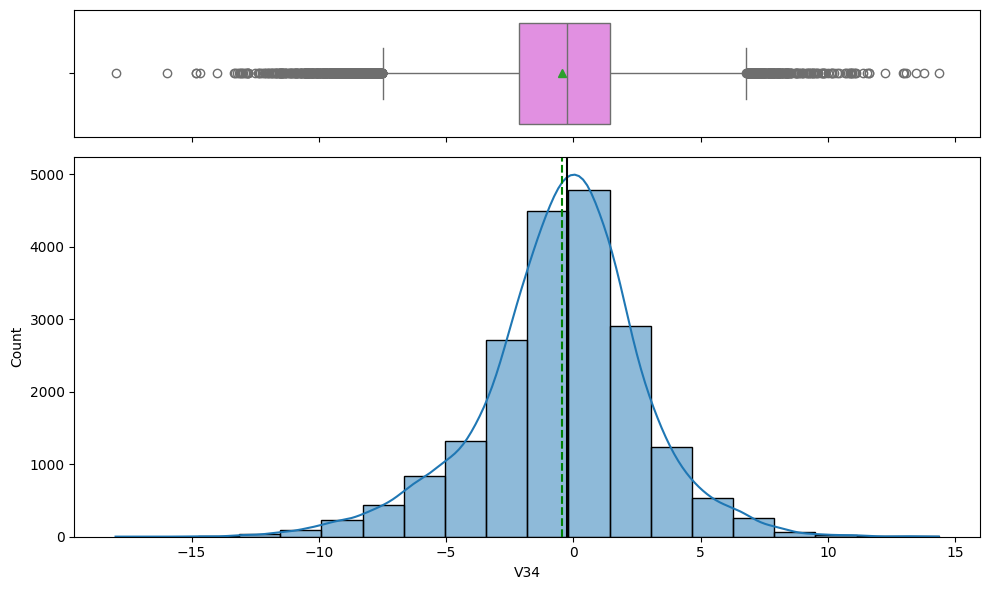


Feature: V35


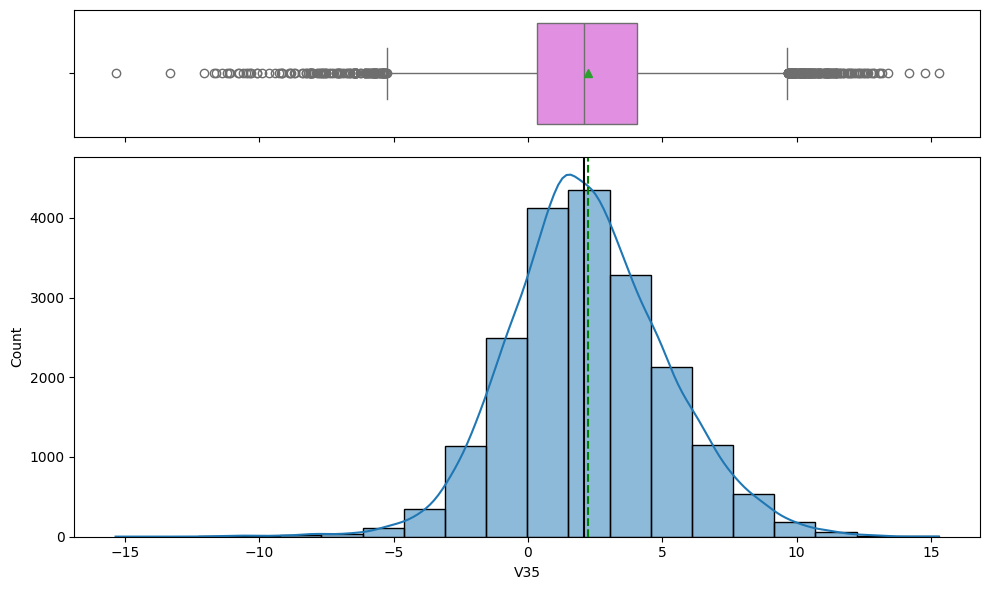


Feature: V36


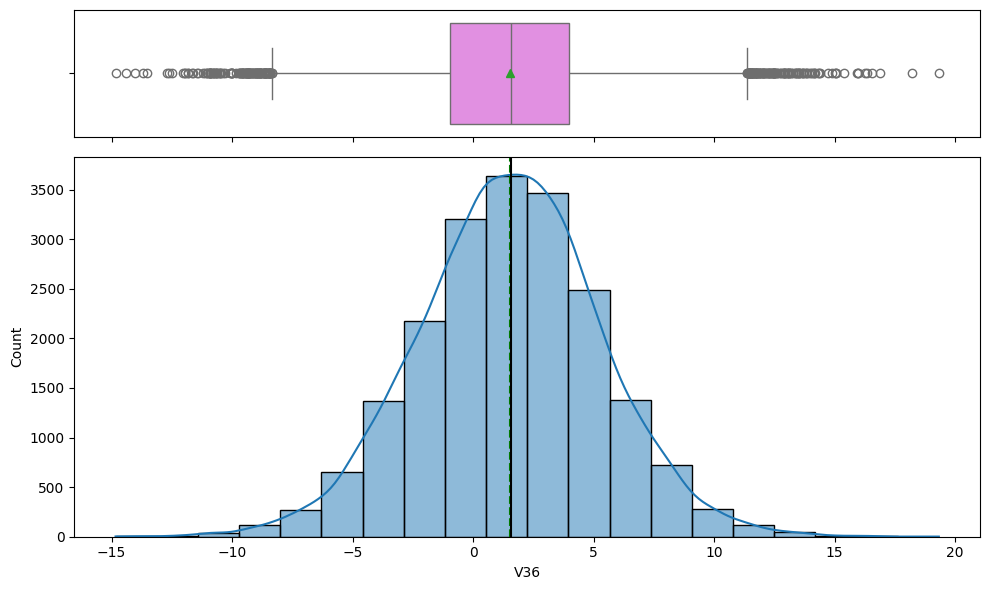


Feature: V37


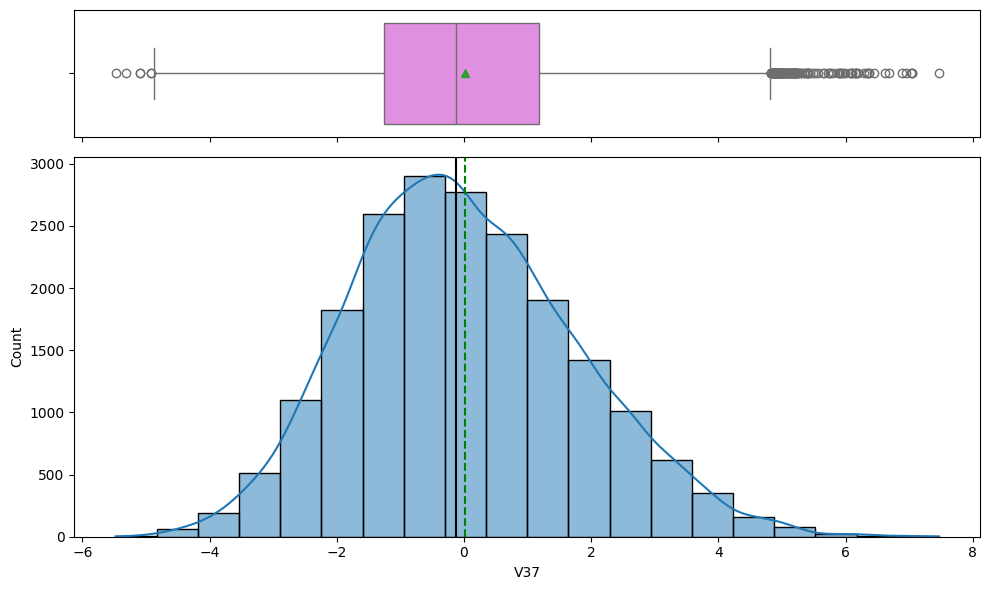


Feature: V38


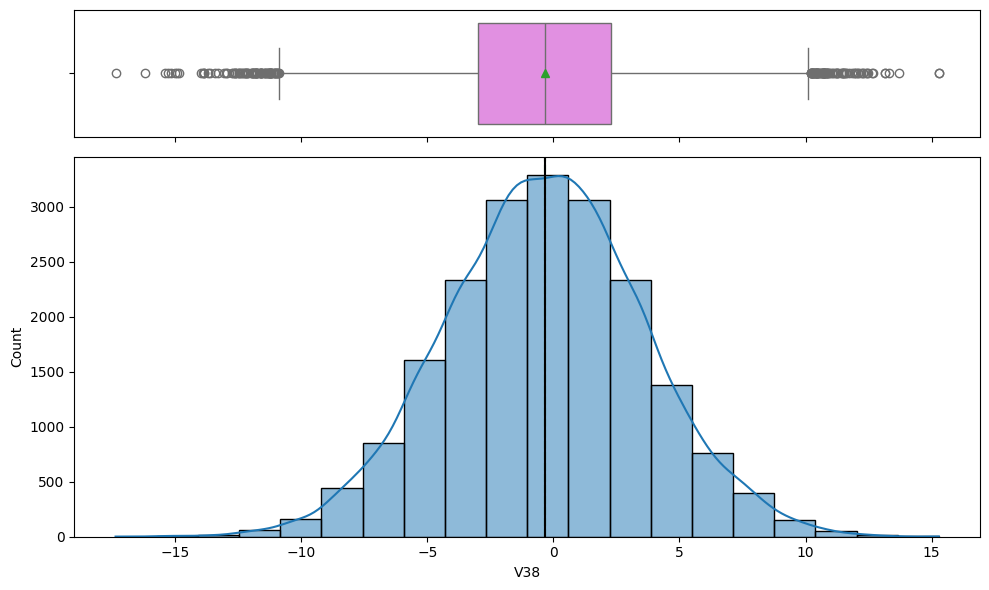


Feature: V39


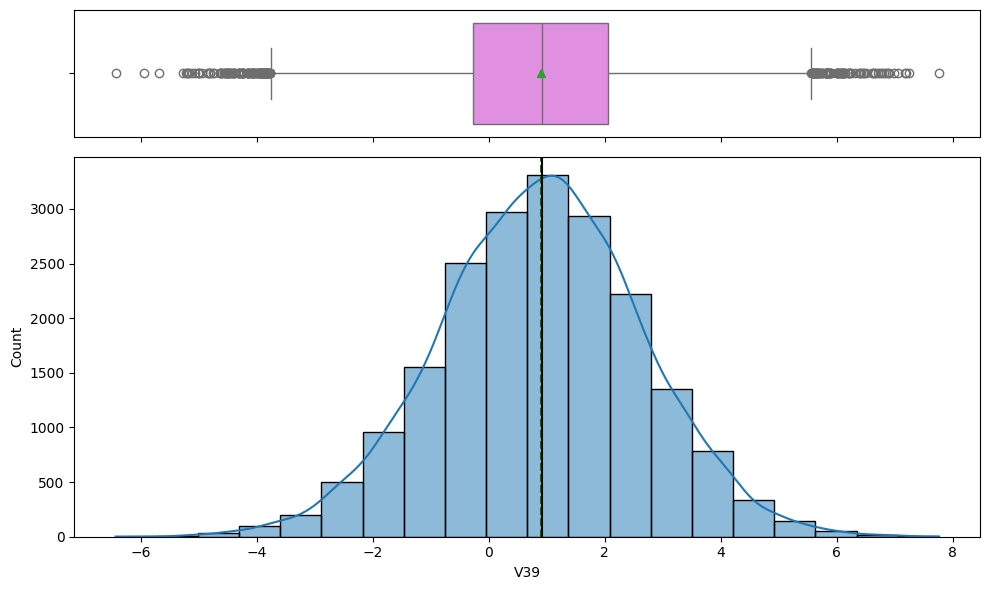


Feature: V40


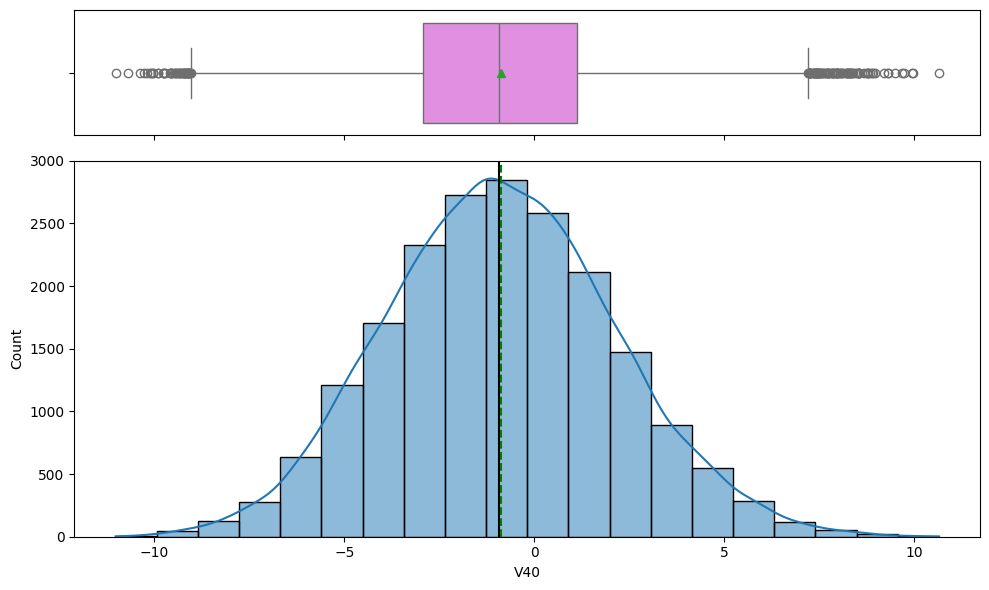


Feature: Target


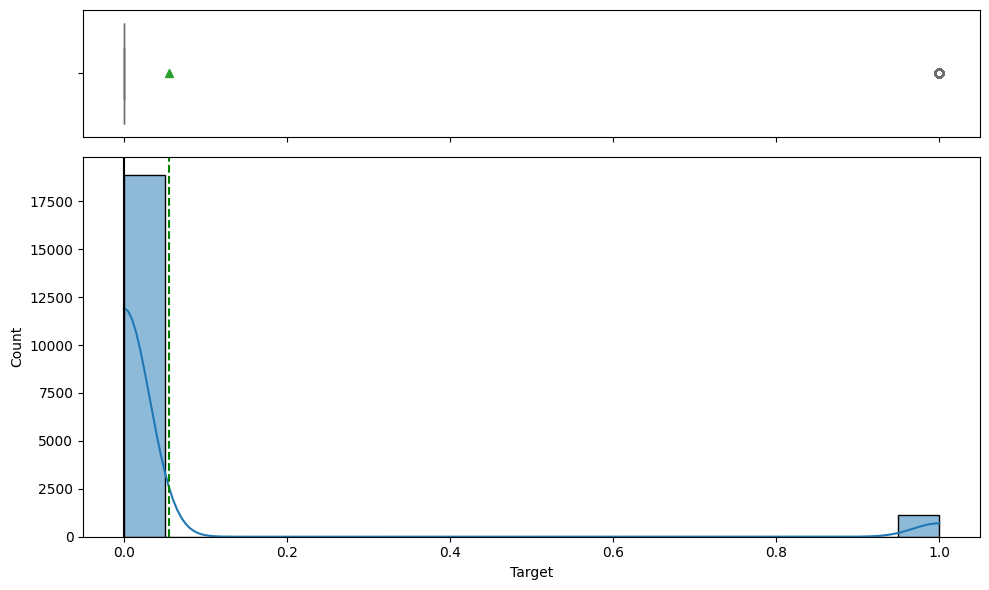

In [134]:
# Plotting on features
for feature in data.columns:
  print(f'\nFeature: {feature}')
  histogram_boxplot(data, feature, bins=20, kde=True)
  plt.tight_layout()
  plt.show()

#### Checking distribution of Target Variable

In [135]:
# For Training dataset
data['Target'].value_counts(normalize=True)

Target
0.0    0.9445
1.0    0.0555
Name: proportion, dtype: float64

In [136]:
# For testing dataset
data_test['Target'].value_counts(normalize=True)

Target
0.0    0.9436
1.0    0.0564
Name: proportion, dtype: float64

* The Target feature has similar distribution on Train and Test dataset.

## Bivariate Analysis

#### Checking correlation among the features

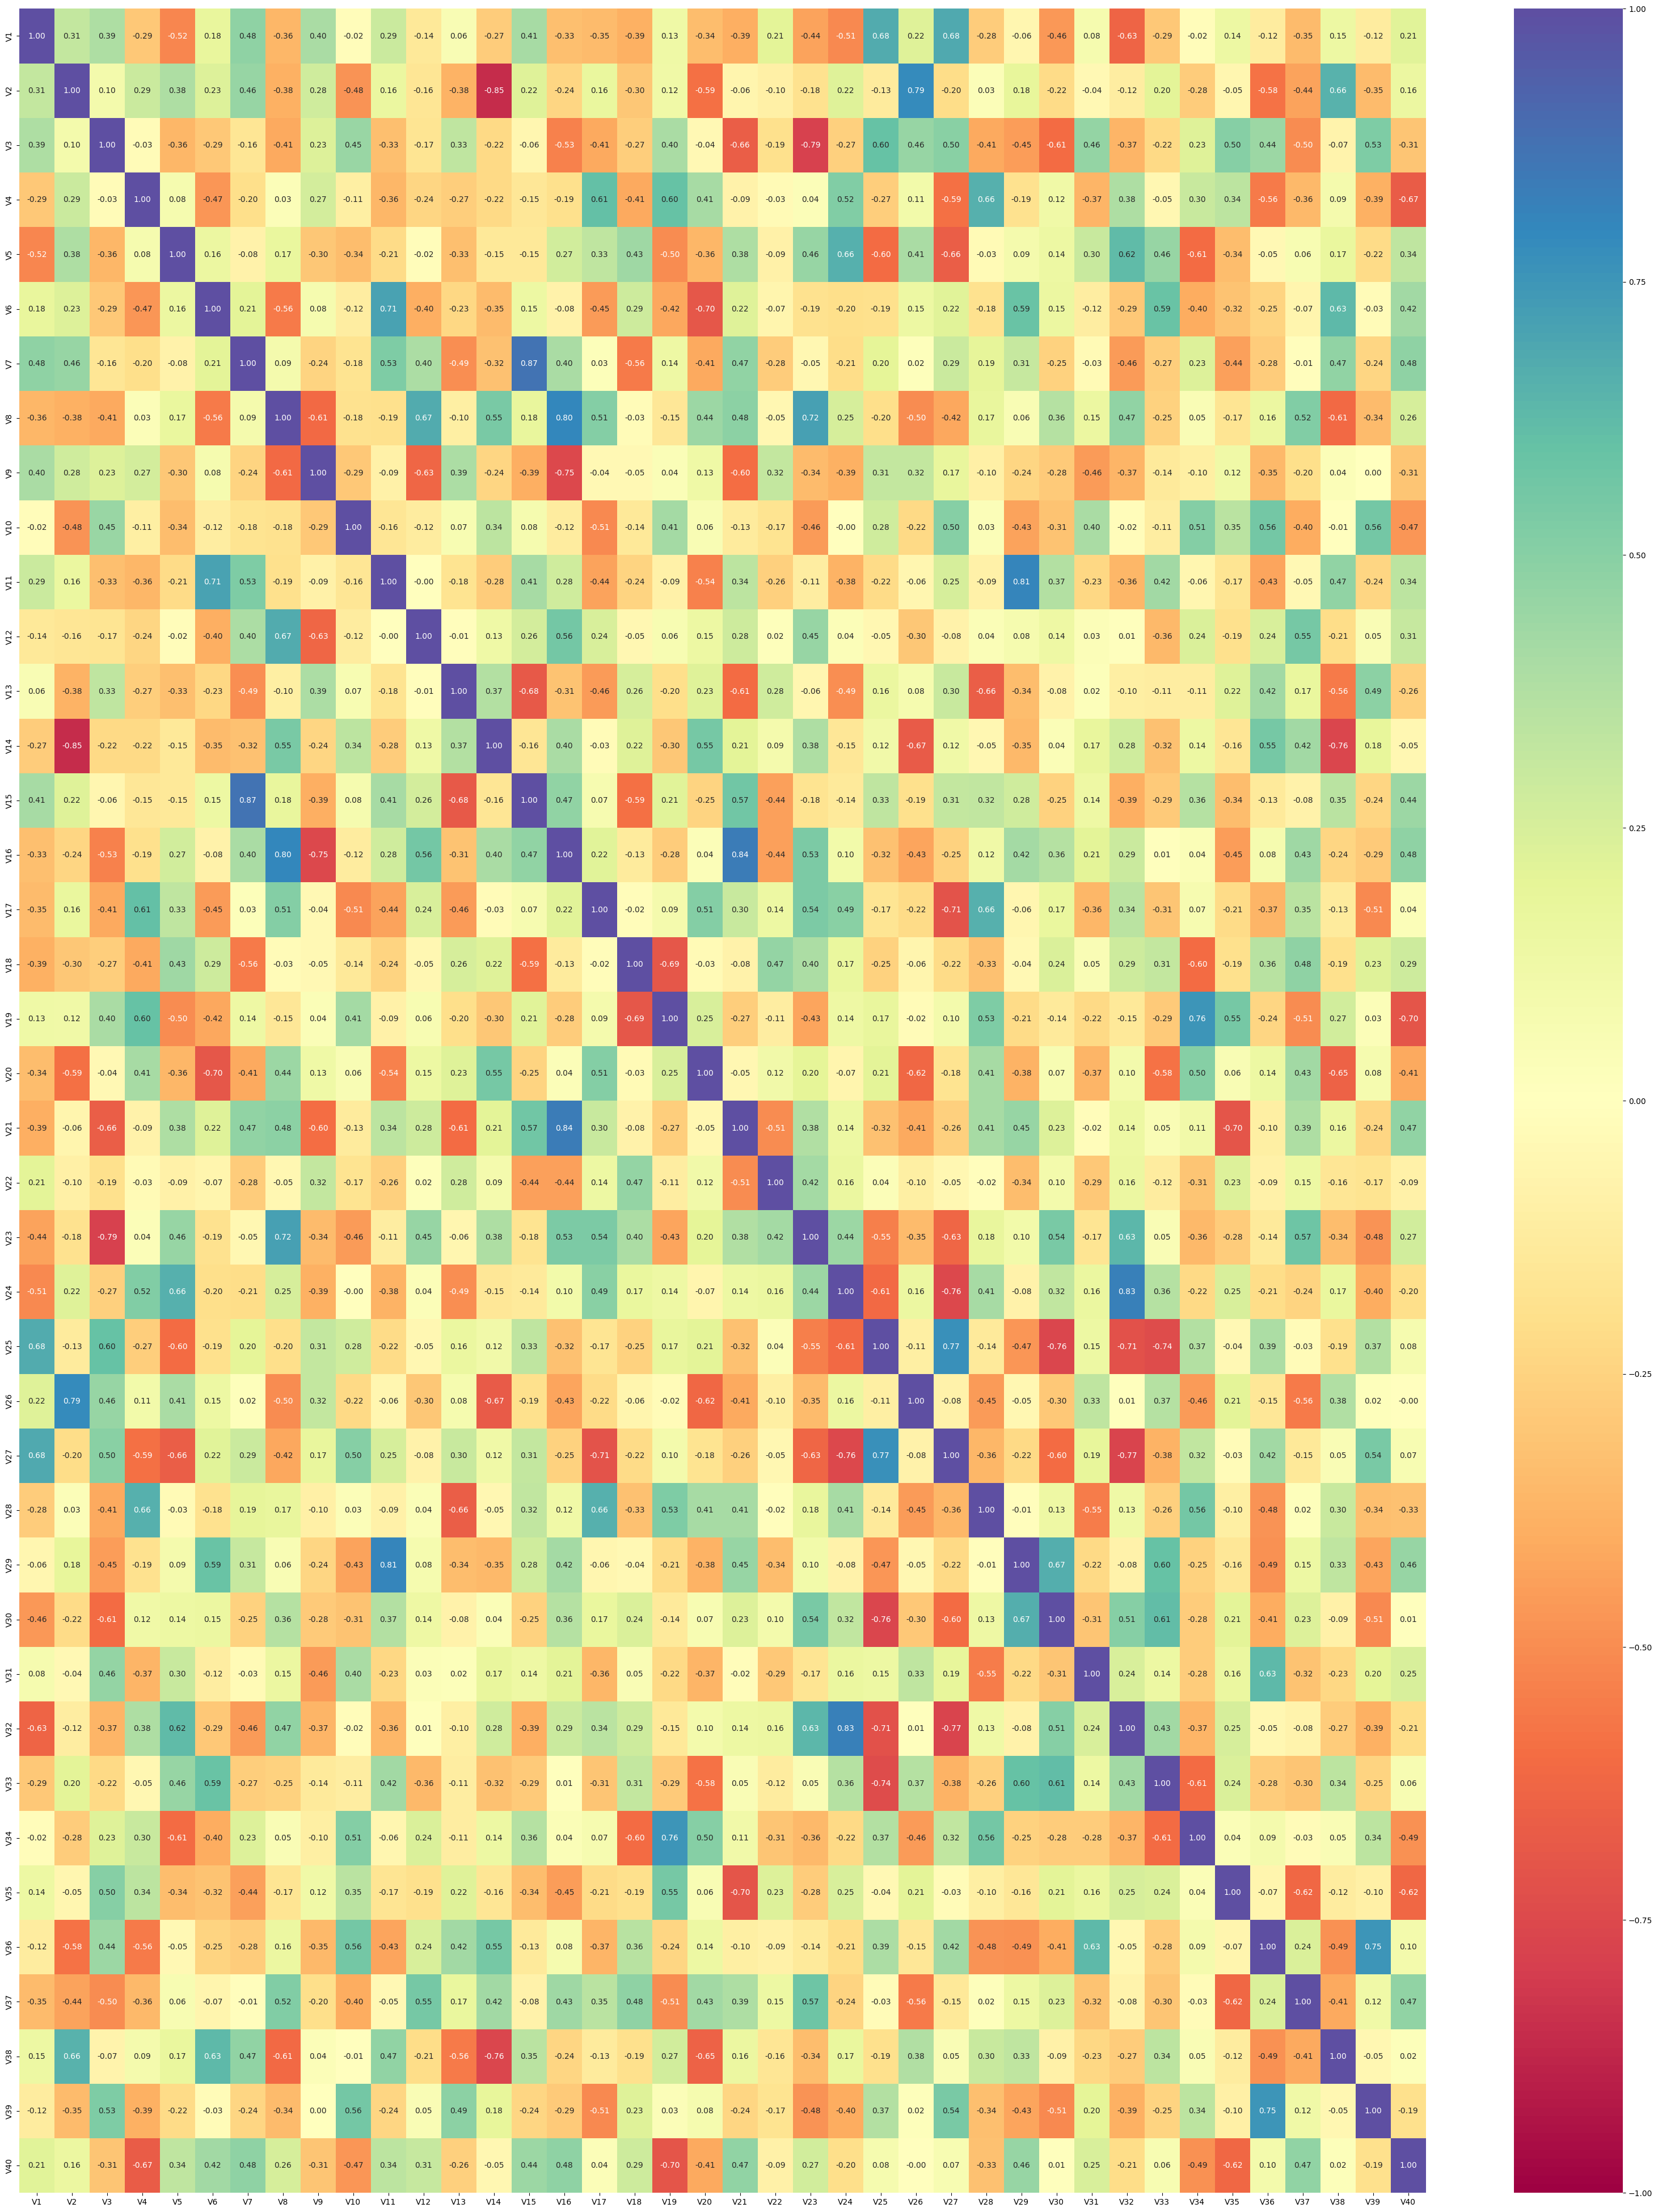

In [137]:
columns = data.select_dtypes(include=np.number).columns.tolist()
columns.remove('Target')
corr = data[columns].corr()

plt.figure(figsize=(40, 50))
sns.heatmap(
    corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

# **Data Preprocessing**

#### Training and Validation split

In [138]:
# Splitting Train dataset to Train and Validation.
X = data.drop('Target', axis=1)
y = data['Target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [139]:
# Shape of Train and validation dataset
X_train.shape, X_val.shape

((16000, 40), (4000, 40))

#### Testing data

In [140]:
# Segregate Testing Independent and dependent features
X_test = data_test.drop('Target', axis=1)
y_test = data_test['Target']

In [141]:
# Shape of Test dataset
X_test.shape

(5000, 40)

#### Missing value Treatment

In [142]:
# Creating instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform
# train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
# validation data
X_val = pd.DataFrame(imputer.fit_transform(X_val), columns=X_train.columns)
# test data
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_train.columns)

In [143]:
# Duplicate and missing value check on Train, Validation and Test dataset
print('Training Dataset')
check_missing_values(X_train)

print('Validation Dataset')
check_missing_values(X_val)

print('Testing Dataset')
check_missing_values(X_test)

Training Dataset
------------------------------
Number of Duplicates in dataset: 0 
Missing V1 count 0
Missing V2 count 0
Missing V3 count 0
Missing V4 count 0
Missing V5 count 0
Missing V6 count 0
Missing V7 count 0
Missing V8 count 0
Missing V9 count 0
Missing V10 count 0
Missing V11 count 0
Missing V12 count 0
Missing V13 count 0
Missing V14 count 0
Missing V15 count 0
Missing V16 count 0
Missing V17 count 0
Missing V18 count 0
Missing V19 count 0
Missing V20 count 0
Missing V21 count 0
Missing V22 count 0
Missing V23 count 0
Missing V24 count 0
Missing V25 count 0
Missing V26 count 0
Missing V27 count 0
Missing V28 count 0
Missing V29 count 0
Missing V30 count 0
Missing V31 count 0
Missing V32 count 0
Missing V33 count 0
Missing V34 count 0
Missing V35 count 0
Missing V36 count 0
Missing V37 count 0
Missing V38 count 0
Missing V39 count 0
Missing V40 count 0


Validation Dataset
------------------------------
Number of Duplicates in dataset: 0 
Missing V1 count 0
Missing V2 count 0

In [144]:
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

# **Model Building**

## Model Evaluation Criterion

Based on the business context, the most important evaluation criteria will be **Recall**.

Here's why:

1.  **Business Objective:** The primary objective is to "identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost."
2.  **Cost Implications:**
    *   False Negatives (FN) are real failures *not* detected by the model. These result in expensive replacement costs.
    *   False Positives (FP) are detections where there is no failure. These result in inspection costs, which are less than repair costs.
    *   True Positives (TP) are failures correctly predicted. These result in repair costs, which are less than replacement costs.
3.  **Minimizing Costly Errors:** The most costly errors are False Negatives (undetected failures leading to replacement). Recall directly measures the model's ability to identify all actual positive cases (failures). A high recall means the model is good at catching failures, minimizing the number of expensive replacements.
4.  **Trade-off Consideration:** While False Positives (inspection costs) are also undesirable, they are explicitly stated as being less costly than False Negatives (replacement costs). Therefore, maximizing the detection of actual failures (maximizing Recall) is more critical, even if it means accepting some false alarms.

In summary, maximizing Recall is crucial because it directly addresses the business need to prevent expensive generator replacements by ensuring that as many actual failures as possible are detected by the model.

#### Utilities

In [145]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [146]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='macro')  # to compute Recall
    precision = precision_score(target, pred, average='macro')  # to compute Precision
    f1 = f1_score(target, pred, average='macro')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,}, index = [0]
    )

    return df_perf

## Initial Model Building (Model 0)

- Let's start with a neural network consisting of
  - just one hidden layer
  - activation function of ReLU
  - SGD as the optimizer

In [147]:
# Setting epochs and Batch Size
EPOCHS = 100
BATCH_SIZE = 32

In [148]:
# Clear current Keras session
tf.keras.backend.clear_session()

In [149]:
# Initializing NN
model_0 = Sequential()
# Adding 1 hidden layer with ReLU activation
model_0.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_0.add(Dense(1, activation='sigmoid'))

In [150]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [151]:
optimizer = tf.keras.optimizers.SGD()
model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'])

In [152]:
start = time.time()
history = model_0.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=BATCH_SIZE, epochs=EPOCHS)
end=time.time()

print("Time taken in seconds ",end-start)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.4395 - loss: 0.1955 - val_Recall: 0.6261 - val_loss: 0.0985
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.6149 - loss: 0.0908 - val_Recall: 0.7342 - val_loss: 0.0866
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7269 - loss: 0.0831 - val_Recall: 0.7523 - val_loss: 0.0794
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7379 - loss: 0.0727 - val_Recall: 0.7658 - val_loss: 0.0760
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.7643 - loss: 0.0714 - val_Recall: 0.7793 - val_loss: 0.0736
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Recall: 0.7844 - loss: 0.0618 - val_Recall: 0.7883 - val_loss: 0.0719
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8110 - loss: 0.0614 - val_Recall: 0.8018 - val_loss: 0.0696
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8152 - loss: 0.0601 - val_Recall: 0.8063 - val_loss: 0.0681


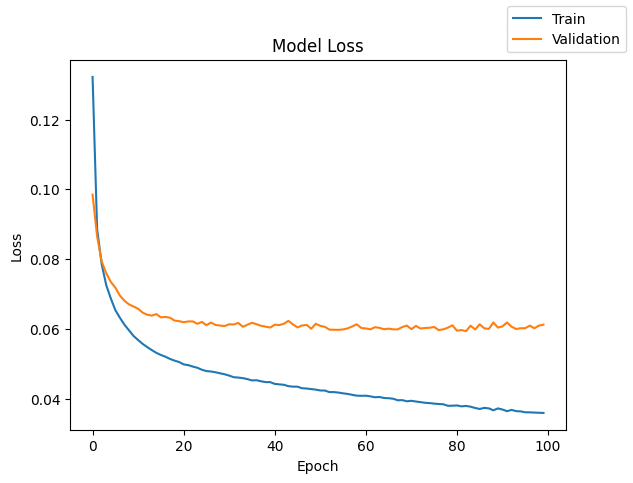

In [153]:
plot(history,'loss')

#### model_0 performance on train and validation dataset

In [154]:
model_0_train_perf = model_performance_classification(model_0, X_train, y_train)
model_0_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.992625  0.937798   0.991296   0.96281

In [155]:
model_0_val_perf = model_performance_classification(model_0,X_val,y_val)
model_0_val_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0   0.98975  0.916137   0.984564   0.94742

# **Model Performance Improvement**

## Model 1

In [156]:
# Clear current Keras session
tf.keras.backend.clear_session()

In [157]:
#Initializing the NN with 2 layer
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(1,activation = 'sigmoid'))

In [158]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,073 (43.25 KB)

 Trainable params: 11,073 (43.25 KB)

 Non-trainable params: 0 (0.00 B)

In [159]:
optimizer = tf.keras.optimizers.SGD()
model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'])

In [160]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=BATCH_SIZE, epochs=EPOCHS)
end=time.time()

print("Time taken in seconds ",end-start)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.1299 - loss: 0.1941 - val_Recall: 0.5405 - val_loss: 0.1035
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.5991 - loss: 0.0991 - val_Recall: 0.6622 - val_loss: 0.0838
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Recall: 0.7023 - loss: 0.0809 - val_Recall: 0.7613 - val_loss: 0.0748
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7568 - loss: 0.0694 - val_Recall: 0.7883 - val_loss: 0.0697
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7953 - loss: 0.0605 - val_Recall: 0.7883 - val_loss: 0.0665
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7978 - loss: 0.0592 - val_Recall: 0.7973 - val_loss: 0.0644
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8091 - loss: 0.0553 - val_Recall: 0.8018 - val_loss: 0.0622
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8125 - loss: 0.0592 - val_Recall: 0.7973 - val_loss: 0.0608


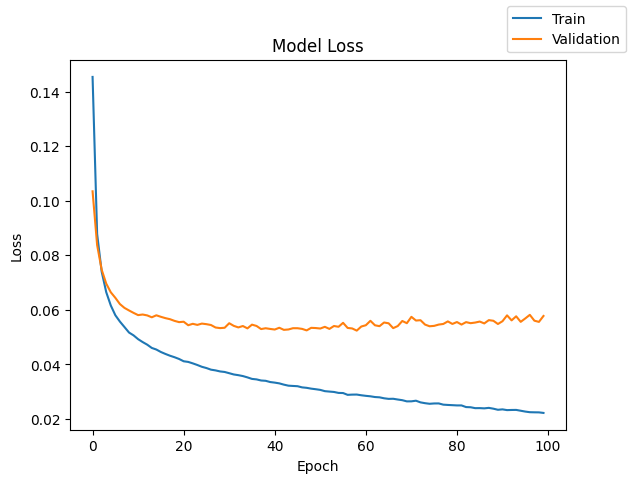

In [161]:
plot(history,'loss')

#### model_1 performance on Train and validation dataset

In [162]:
model_1_train_perf = model_performance_classification(model_1,X_train,y_train)
model_1_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.994938  0.955982   0.995587  0.974854

In [163]:
model_1_val_perf = model_performance_classification(model_1,X_val,y_val)
model_1_val_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0    0.9915  0.936143   0.981316  0.957472

## Model 2

In [164]:
# Clear current Keras session
tf.keras.backend.clear_session()

In [165]:
#Initializing the neural network
model_2 = Sequential()
model_2.add(Dense(64 ,activation="relu",input_dim=X_train.shape[1]))
# Adding 50% dropout rate
model_2.add(Dropout(0.5))
model_2.add(Dense(128, activation = "relu"))
model_2.add(Dense(1, activation="sigmoid"))

In [166]:
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,073 (43.25 KB)

 Trainable params: 11,073 (43.25 KB)

 Non-trainable params: 0 (0.00 B)

In [167]:
optimizer = tf.keras.optimizers.SGD()
model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'])

In [168]:
start = time.time()
history = model_2.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=BATCH_SIZE, epochs=EPOCHS)
end=time.time()

print("Time taken in seconds ",end-start)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.0878 - loss: 0.2560 - val_Recall: 0.4369 - val_loss: 0.1299
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.2959 - loss: 0.1517 - val_Recall: 0.6532 - val_loss: 0.1106
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.4148 - loss: 0.1277 - val_Recall: 0.7072 - val_loss: 0.0960
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Recall: 0.4953 - loss: 0.1114 - val_Recall: 0.7207 - val_loss: 0.0893
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.5445 - loss: 0.1036 - val_Recall: 0.7477 - val_loss: 0.0854
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.5563 - loss: 0.1079 - val_Recall: 0.7523 - val_loss: 0.0804
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.6152 - loss: 0.0990 - val_Recall: 0.7568 - val_loss: 0.0768
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.6283 - loss: 0.0946 - val_Recall: 0.7793 - val_loss: 0.0737


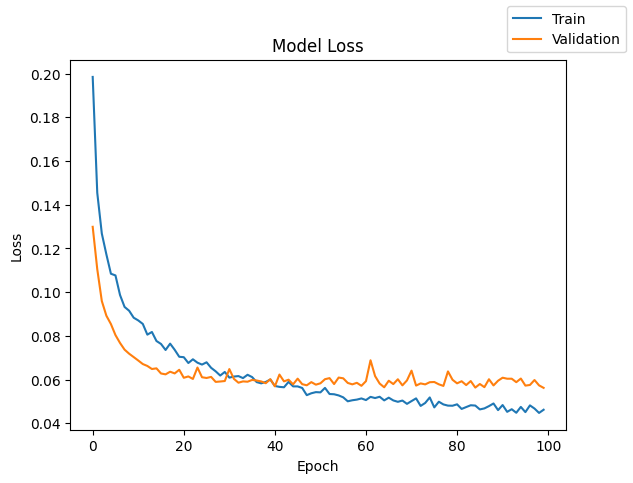

In [169]:
plot(history,'loss')

#### model_2 performance on Train and validation dataset

In [170]:
model_2_train_perf = model_performance_classification(model_2,X_train,y_train)
model_2_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.993125  0.942303   0.991608  0.965487

In [171]:
model_2_val_perf = model_performance_classification(model_2,X_val,y_val)
model_2_val_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0   0.99025  0.922762   0.982581  0.950441

## Model 3

#### Introducing class weight to allow model to balance minority class

In [172]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train.astype(int)) # Convert y_train to integers

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: np.float64(1.0587612493382743), 1: np.float64(18.01801801801802)}

In [173]:
# Clear current Keras session
tf.keras.backend.clear_session()

In [174]:
#Initializing the neural network
model_3 = Sequential()
model_3.add(Dense(64 ,activation="relu",input_dim=X_train.shape[1]))
# Adding 50% dropout rate
model_3.add(Dropout(0.5))
model_3.add(Dense(128, activation = "relu"))
model_3.add(Dense(1, activation="sigmoid"))

In [175]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,073 (43.25 KB)

 Trainable params: 11,073 (43.25 KB)

 Non-trainable params: 0 (0.00 B)

In [176]:
optimizer = tf.keras.optimizers.SGD()
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'])

In [177]:
start = time.time()
history = model_3.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=BATCH_SIZE, epochs=EPOCHS,class_weight=cw_dict)
end=time.time()

print("Time taken in seconds ",end-start)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.7914 - loss: 1.0135 - val_Recall: 0.8919 - val_loss: 0.2609
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8712 - loss: 0.6550 - val_Recall: 0.8874 - val_loss: 0.2482
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.8764 - loss: 0.5301 - val_Recall: 0.8829 - val_loss: 0.1984
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.8780 - loss: 0.5337 - val_Recall: 0.8874 - val_loss: 0.1862
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.8867 - loss: 0.4993 - val_Recall: 0.8829 - val_loss: 0.1680
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Recall: 0.8736 - loss: 0.4902 - val_Recall: 0.8829 - val_loss: 0.1589
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8998 - loss: 0.4350 - val_Recall: 0.8829 - val_loss: 0.1599
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8984 - loss: 0.4205 - val_Recall: 0.8919 - val_loss: 0.1900


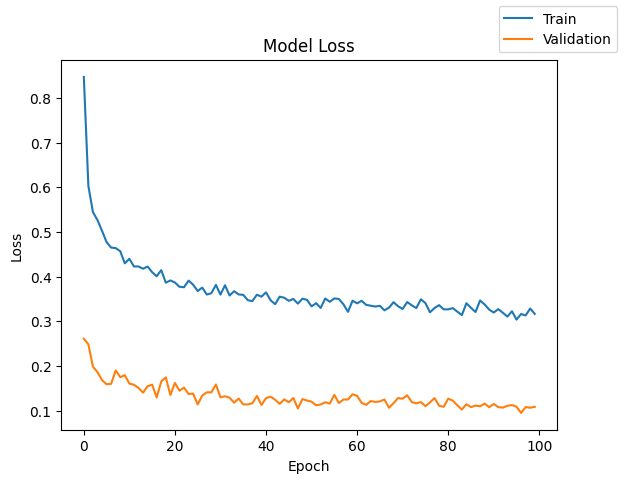

In [178]:
plot(history,'loss')

#### model_3 performance on Train and Va;lidation dataset

In [179]:
model_3_train_perf = model_performance_classification(model_3,X_train,y_train)
model_3_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.993375  0.956745   0.979161  0.967649

In [180]:
model_3_val_perf = model_performance_classification(model_3,X_val,y_val)
model_3_val_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0   0.99175  0.942635   0.977194   0.95918

## Model 4

#### Using Adam as Optimizer

In [181]:
# Clear current Keras session
tf.keras.backend.clear_session()

In [182]:
#Initializing the neural network
model_4 = Sequential()
model_4.add(Dense(64 ,activation="relu",input_dim=X_train.shape[1]))
model_4.add(Dense(128 ,activation="relu"))
model_4.add(Dense(1 ,activation="sigmoid"))

In [183]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,073 (43.25 KB)

 Trainable params: 11,073 (43.25 KB)

 Non-trainable params: 0 (0.00 B)

In [184]:
optimizer = tf.keras.optimizers.Adam()
model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'])

In [185]:
start = time.time()
history = model_4.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=BATCH_SIZE, epochs=EPOCHS)
end=time.time()

print("Time taken in seconds ",end-start)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.5297 - loss: 0.1117 - val_Recall: 0.8288 - val_loss: 0.0652
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8512 - loss: 0.0463 - val_Recall: 0.8649 - val_loss: 0.0600
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.8563 - loss: 0.0492 - val_Recall: 0.8514 - val_loss: 0.0606
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.8860 - loss: 0.0416 - val_Recall: 0.8739 - val_loss: 0.0588
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Recall: 0.9024 - loss: 0.0357 - val_Recall: 0.8739 - val_loss: 0.0566
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.9031 - loss: 0.0304 - val_Recall: 0.8514 - val_loss: 0.0582
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8897 - loss: 0.0340 - val_Recall: 0.8829 - val_loss: 0.0599
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.9059 - loss: 0.0324 - val_Recall: 0.8829 - val_loss: 0.0570


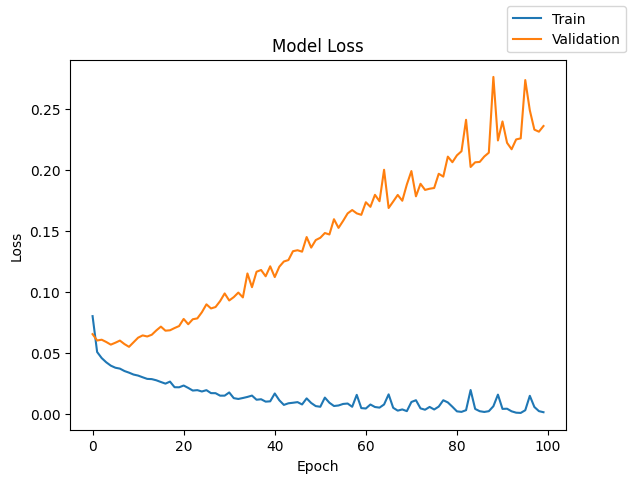

In [186]:
plot(history,'loss')

In [187]:
model_4_train_perf = model_performance_classification(model_4,X_train,y_train)
model_4_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.999875  0.999404   0.999404  0.999404

In [188]:
model_4_val_perf = model_performance_classification(model_4,X_val,y_val)
model_4_val_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0   0.98975  0.928857   0.971044  0.948831

## Model 5

#### Adding Dropout with more dense layer and Adam Optimizer

In [189]:
# Clear current Keras session
tf.keras.backend.clear_session()

In [190]:
#Initializing the neural network
model_5 = Sequential()
model_5.add(Dense(64 ,activation="relu",input_dim=X_train.shape[1]))
# Adding 50% dropout rate
model_5.add(Dropout(0.5))
model_5.add(Dense(128, activation = "relu"))
model_5.add(Dense(1, activation="sigmoid"))

In [191]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,073 (43.25 KB)

 Trainable params: 11,073 (43.25 KB)

 Non-trainable params: 0 (0.00 B)

In [192]:
optimizer = tf.keras.optimizers.Adam()
model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'])

In [193]:
start = time.time()
history = model_5.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=BATCH_SIZE, epochs=EPOCHS)
end=time.time()

print("Time taken in seconds ",end-start)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.2977 - loss: 0.2267 - val_Recall: 0.7072 - val_loss: 0.0788
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.6341 - loss: 0.0925 - val_Recall: 0.7748 - val_loss: 0.0663
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.6910 - loss: 0.0851 - val_Recall: 0.7883 - val_loss: 0.0710
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.7425 - loss: 0.0820 - val_Recall: 0.8063 - val_loss: 0.0615
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.7620 - loss: 0.0712 - val_Recall: 0.8288 - val_loss: 0.0603
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Recall: 0.7739 - loss: 0.0642 - val_Recall: 0.8378 - val_loss: 0.0588
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.7979 - loss: 0.0598 - val_Recall: 0.8423 - val_loss: 0.0619
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.8090 - loss: 0.0585 - val_Recall: 0.8243 - val_loss: 0.0564


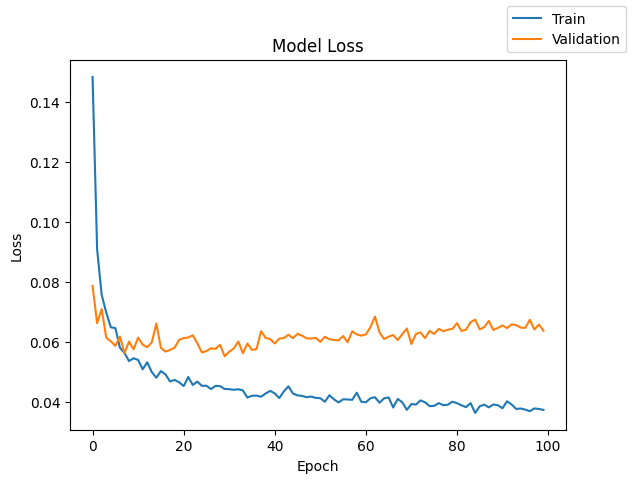

In [194]:
plot(history,'loss')

In [195]:
model_5_train_perf = model_performance_classification(model_5,X_train,y_train)
model_5_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.993812  0.944257   0.996746  0.968851

In [196]:
model_5_val_perf = model_performance_classification(model_5,X_val,y_val)
model_5_val_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0     0.991  0.925279   0.987855  0.954149

## Model 6

#### Introducing class weight to allow model to balance minority class and Adam as optimizer

In [197]:
# Clear current Keras session
tf.keras.backend.clear_session()

In [198]:
#Initializing the neural network
model_6 = Sequential()
model_6.add(Dense(64 ,activation="relu",input_dim=X_train.shape[1]))
# Adding 50% dropout rate
model_6.add(Dropout(0.5))
model_6.add(Dense(64, activation = "relu"))
model_6.add(Dense(1, activation="sigmoid"))

In [199]:
model_6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,849 (26.75 KB)

 Trainable params: 6,849 (26.75 KB)

 Non-trainable params: 0 (0.00 B)

In [200]:
optimizer = tf.keras.optimizers.Adam(learning_rate=.001)
model_6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'])

In [201]:
start = time.time()
history = model_6.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=BATCH_SIZE, epochs=200,class_weight=cw_dict )
end=time.time()

print("Time taken in seconds ",end-start)

Epoch 1/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.7503 - loss: 1.0926 - val_Recall: 0.8378 - val_loss: 0.1704
Epoch 2/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.8374 - loss: 0.6911 - val_Recall: 0.8649 - val_loss: 0.1670
Epoch 3/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8822 - loss: 0.5656 - val_Recall: 0.8964 - val_loss: 0.1772
Epoch 4/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Recall: 0.8938 - loss: 0.5306 - val_Recall: 0.8784 - val_loss: 0.1406
Epoch 5/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.9049 - loss: 0.4469 - val_Recall: 0.8829 - val_loss: 0.1291
Epoch 6/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.8729 - loss: 0.4727 - val_Recall: 0.8784 - val_loss: 0.1440
Epoch 7/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.8834 - loss: 0.4986 - val_Recall: 0.8649 - val_loss: 0.1397
Epoch 8/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.8893 - loss: 0.4417 - val_Recall: 0.8829 - val_loss: 0.1215


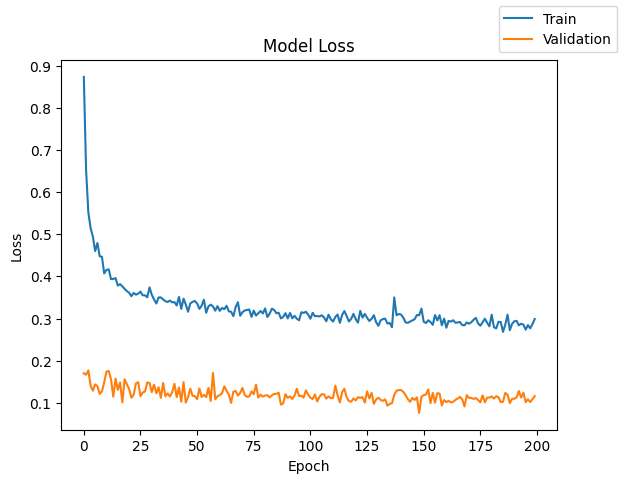

In [202]:
plot(history,'loss')

In [203]:
model_6_train_perf = model_performance_classification(model_6,X_train,y_train)
model_6_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy    Recall  Precision  F1 Score
0   0.99275  0.960124   0.970103  0.965053

In [204]:
model_6_val_perf = model_performance_classification(model_6,X_val,y_val)
model_6_val_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0     0.991  0.944358   0.968262  0.955955

# **Model Performance Comparison and Final Model Selection**

Now, in order to select the final model, we will compare the performances of all the models for the training and validation sets.

In [205]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T

    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Model 0",
    "Model 1",
    "Model 2",
    "Model 3",
    "Model 4",
    "Model 5",
    "Model 6"
]

# Validation performance comparison
models_val_comp_df = pd.concat(
    [
        model_0_val_perf.T,
        model_1_val_perf.T,
        model_2_val_perf.T,
        model_3_val_perf.T,
        model_4_val_perf.T,
        model_5_val_perf.T,
        model_6_val_perf.T

    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Model 0",
    "Model 1",
    "Model 2",
    "Model 3",
    "Model 4",
    "Model 5",
    "Model 6"
]


In [206]:
print("Training set performance comparison:")
models_train_comp_df

Training set performance comparison:


Model 0   Model 1   Model 2   Model 3   Model 4   Model 5  \
Accuracy   0.992625  0.994938  0.993125  0.993375  0.999875  0.993812   
Recall     0.937798  0.955982  0.942303  0.956745  0.999404  0.944257   
Precision  0.991296  0.995587  0.991608  0.979161  0.999404  0.996746   
F1 Score   0.962810  0.974854  0.965487  0.967649  0.999404  0.968851   

            Model 6  
Accuracy   0.992750  
Recall     0.960124  
Precision  0.970103  
F1 Score   0.965053

In [207]:
print("Validation set performance comparison:")
models_val_comp_df

Validation set performance comparison:


Model 0   Model 1   Model 2   Model 3   Model 4   Model 5  \
Accuracy   0.989750  0.991500  0.990250  0.991750  0.989750  0.991000   
Recall     0.916137  0.936143  0.922762  0.942635  0.928857  0.925279   
Precision  0.984564  0.981316  0.982581  0.977194  0.971044  0.987855   
F1 Score   0.947420  0.957472  0.950441  0.959180  0.948831  0.954149   

            Model 6  
Accuracy   0.991000  
Recall     0.944358  
Precision  0.968262  
F1 Score   0.955955

Now, let's check the performance of the final model on the test set.

In [208]:
# Model 6 with highest recall on validation seems to be the best model
best_model = model_6

# Test set performance for the best model
best_model_test_perf = model_performance_classification(best_model,X_test,y_test)
best_model_test_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0    0.9884  0.933839   0.955151  0.944204

# **Actionable Insights and Recommendations**

Write down some insights and business recommendations based on your observations.

#### Actionable Insights

1.  **Class Imbalance is Significant:** The initial data exploration clearly shows a substantial class imbalance, with a much higher proportion of "no failure" (0) than "failure" (1) in the target variable. This is a critical insight because standard classification models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class (failures), which is the target of interest for prediction.
2.  **Recall is the Key Metric:** Based on the cost structure provided (replacement > repair > inspection), the most important metric is Recall. Undetected failures (False Negatives) are the most expensive errors. The modeling process correctly prioritizes maximizing Recall over other metrics like Accuracy or Precision.
3.  **Initial Models Struggled:** Models 0, 1, 2, 4, and 5, which did not explicitly address the class imbalance or used a standard optimizer like SGD without class weights, showed relatively low validation Recall, indicating they were not effectively identifying failures.
4.  **Class Weights Significantly Improved Recall:** Model 3 and Model 6, which incorporated `class_weight` during training, showed a dramatic increase in Recall on both the training and validation sets compared to their counterparts without class weights (Model 2 vs Model 3, Model 5 vs Model 6). This confirms that addressing the class imbalance is crucial for this problem.
5.  **Adam Optimizer Performed Better:** Comparing Model 3 (SGD + Class Weights) and Model 6 (Adam + Class Weights), Model 6 achieved a notably higher Recall on the validation set, suggesting that the Adam optimizer was more effective in finding a good solution for this imbalanced classification problem when combined with class weights.
6.  **Dropout Helped Manage Overfitting:** While not the primary driver of Recall improvement, the models with Dropout (Model 2, 3, 5, 6) generally showed a smaller gap between training and validation performance compared to models without Dropout (Model 0, 1, 4), suggesting it played a role in preventing overfitting to the training data.
7.  **Model 6 is the Best Performer:** Based on the validation set Recall (which is the primary evaluation criterion), Model 6 (Neural Network with two dense layers, Dropout, Adam optimizer, and Class Weights) demonstrated the best performance, achieving the highest Recall score.

### Business Recommendations

1.  **Deploy Model 6 for Predictive Maintenance:** Implement Model 6 as the core of ReneWind's predictive maintenance system. This model is best equipped to identify potential generator failures early due to its high Recall score, directly addressing the objective of reducing expensive replacement costs.
2.  **Set an Appropriate Prediction Threshold:** While the default threshold of 0.5 was used for evaluation, ReneWind should explore adjusting the prediction threshold based on the desired trade-off between False Positives (inspection costs) and False Negatives (replacement costs). If minimizing costly replacements is paramount, a lower threshold might be considered, even if it slightly increases the number of inspections. Analyze the precision-recall curve to guide this decision.
3.  **Establish an Inspection Protocol for Predicted Failures:** For every instance where the model predicts a 'failure' (based on the chosen threshold), establish a clear and efficient inspection protocol. This minimizes the cost associated with False Positives and allows for timely repairs for True Positives.
4.  **Continuously Monitor Model Performance:** The environment and sensor data may change over time. Set up a system to continuously monitor the performance of the deployed model on new data, particularly tracking Recall. Retraining or updating the model may be necessary periodically to maintain optimal performance.
5.  **Collect More Data on Failure Cases:** The class imbalance is a significant challenge. While class weights help, obtaining more labeled data specifically for generator failure instances (if possible through better data collection or expert labeling) would likely further improve model performance and robustness.
6.  **Investigate Feature Importance (if possible):** Although the provided data is ciphered, if any insights into the underlying features can be gained or mapped back to physical components, analyze which features the model relies on most heavily for prediction. This could provide valuable engineering insights into which components or conditions are most indicative of impending failure, allowing for targeted monitoring and maintenance efforts.
7.  **Estimate Cost Savings:** Quantify the potential cost savings by comparing the predicted number of True Positives (resulting in cheaper repairs) and the reduced number of False Negatives (avoiding expensive replacements) enabled by the model compared to current maintenance practices. This provides a clear business justification for the investment in predictive maintenance.